# Capstone Project: Toronto BikeShare
## Part 1: Data Clean & EDA
---
Jason Ho<br>
November 16th, 2020

To begin my Capstone Project I will be gathering data from several sources, cleaning it by imputation and/or removing any null values then combining the datasets together as my main working dataset. Afterwards I will be completing exploratory data analysis (EDA) to gain some basic insights into the data I will working with.
<br>

Before we go ahead with loading in the packages, you will need to create a new conda environment by using the package list included in the zip folder by running the script below.

```bash
conda create -n jho_capstone_env --file jho_capstone_env.txt
```

You may change jho_capstone_env to any name you prefer.

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Timer
from tqdm import tqdm 
import time

## Table of Contents
[Loading and Inspecting the Data](#Loading-and-Inspecting-the-Data)<br>
- [2017 Trips Data](#2017-Trips-Data)<br>
- [2018 Trips Data](#2018-Trips-Data)<br>
- [2019 Trips Data](#2019-Trips-Data)<br>
- [2020 Trips Data](#2020-Trips-Data)<br>
- [2017 Weather Data](#2017-Weather-Data)<br>
- [2018 Weather Data](#2018-Weather-Data)<br>
- [2019 Weather Data](#2019-Weather-Data)<br>
- [2020 Weather Data](#2020-Weather-Data)<br>

[Inspect & Clean Data](#Inspect-&-Clean-Data)<br>
- [2017 Trips Dataset](#2017-Trips-Dataset)<br>
- [2018 Trips Dataset](#2018-Trips-Dataset)<br>
- [2019 Trips Dataset](#2019-Trips-Dataset)<br>
- [2020 Trips Dataset](#2020-Trips-Dataset)<br>
- [2017 Weather Dataset](#2017-Weather-Dataset)<br>
- [2018 Weather Dataset](#2018-Weather-Dataset)<br>
- [2019 Weather Dataset](#2019-Weather-Dataset)<br>
- [2020 Weather Dataset](#2020-Weather-Dataset)<br>

[Loading JSON Datasets](#Loading-JSON-Datasets)<br>
- [Station Information](#Station-Information)<br>
- [Pricing Plan](#Pricing-Plan)<br>
- [Station Status](#Station-Status)

[Feature Engineering](#Feature-Engineering)<br>
- [Trip Datasets](#Trip-Datasets)<br>
- [Station Information Dataset](#Station-Information-Dataset)

[Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>

---
## Loading and Inspecting the Data

**Reference Sources**<br>

[City of Toronto: Open Data](https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/)<br>
City of Toronto has an open data catalogue where I obtained Toronto BikeShare trip datasets from 2017 to 2020.

[CKAN](https://ckan0.cf.opendata.inter.prod-toronto.ca/en/dataset/bike-share-toronto)<br>
CKAN is an open-source data portal platform where I obtained the links to the Toronto BikeShare API to request up-to-date data regarding BikeShare station information.

[Government of Canada](https://climate.weather.gc.ca/historical_data/search_historic_data_e.html)<br>
Government of Canada has a catalogue of historical weather data throughout various weather stations across Canada.


### 2017 Trips Data
**About the Dataset**

The following dataset contain 1,492,369 bike trips taken during the year 2017 between  more than 600 stations across the City of Toronto. The csv contains 9 features. The description of each feature is listed below:

- `trip_id`: Unique ID code for individual trip taken.
- `trip_start_time`: Trip start time.
- `trip_end_time`: Trip end time.
- `trip_duration_seconds`: Duration of the trip in seconds.
- `from_station_id`: Unique ID code for the start station.
- `from_station_name`: Name of start station.
- `to_station_id`: Unique ID code for the end station.
- `to_station_name`: Name of end station.
- `user_type`: Type of user, either Member or Casual.

In [2]:
# Load in 2017 datasets
Q1_17 = pd.read_csv('data/Bikeshare 2017/2017-Q1.csv')
Q2_17 = pd.read_csv('data/Bikeshare 2017/2017-Q2.csv')
Q3_17 = pd.read_csv('data/Bikeshare 2017/2017-Q3.csv')
Q4_17 = pd.read_csv('data/Bikeshare 2017/2017-Q4.csv')

### 2018 Trips Data
**About the Dataset**

The following dataset contain 1,922,955 bike trips taken during the year 2018 between  more than 600 stations across the City of Toronto. The csv contains 9 features. The description of each feature is listed below:

- `trip_id`: Unique ID code for individual trip taken.
- `trip_start_time`: Trip start time.
- `trip_end_time`: Trip end time.
- `trip_duration_seconds`: Duration of the trip in seconds.
- `from_station_id`: Unique ID code for the start station.
- `from_station_name`: Name of start station.
- `to_station_id`: Unique ID code for the end station.
- `to_station_name`: Name of end station.
- `user_type`: Type of user, either Member or Casual.

In [3]:
# Load in 2018 datasets
Q1_18 = pd.read_csv('data/Bikeshare 2018/2018-Q1.csv')
Q2_18 = pd.read_csv('data/Bikeshare 2018/2018-Q2.csv')
Q3_18 = pd.read_csv('data/Bikeshare 2018/2018-Q3.csv')
Q4_18 = pd.read_csv('data/Bikeshare 2018/2018-Q4.csv')

### 2019 Trips Data
**About the Dataset**

The following dataset contain 2,439,517 bike trips taken during the year 2019 between 600 stations across the City of Toronto. The csv contains 11 features. The description of each feature is listed below:

- `Trip Id`: Unique ID code for individual trip taken.
- `Subscription Id`: Unique ID code for the individual member, this can be used to track Annual Member usage.
- `Trip  Duration`: Duration of the trip in seconds.
- `Start Station Id`: Unique ID code for the start station.
- `Start Time`: Trip start time.
- `Start Station Name`: Name of start station.
- `End Station Id`: Unique ID code for the end station.
- `End Time`: Trip end time.
- `End Station Name`: Name of end station.
- `Bike Id`: Unique ID for the individual bike used.
- `User Type`: Type of user, either Annual or Casual.

In [4]:
# Load in 2019 datasets
Q1_19 = pd.read_csv('data/Bikeshare 2019/2019-Q1.csv')
Q2_19 = pd.read_csv('data/Bikeshare 2019/2019-Q2.csv')
Q3_19 = pd.read_csv('data/Bikeshare 2019/2019-Q3.csv')
Q4_19 = pd.read_csv('data/Bikeshare 2019/2019-Q4.csv')

### 2020 Trips Data
**About the Dataset**

The following dataset contain 2,612,704 bike trips taken during the year 2020 up until October between 600 stations across the City of Toronto. The csv contains 11 features. The description of each feature is listed below:

- `Trip Id`: Unique ID code for individual trip taken.
- `Subscription Id`: Unique ID code for the individual member, this can be used to track Annual Member usage.
- `Trip  Duration`: Duration of the trip in seconds.
- `Start Station Id`: Unique ID code for the start station.
- `Start Time`: Trip start time.
- `Start Station Name`: Name of start station.
- `End Station Id`: Unique ID code for the end station.
- `End Time`: Trip end time.
- `End Station Name`: Name of end station.
- `Bike Id`: Unique ID for the individual bike used.
- `User Type`: Type of user, either Annual or Casual.

In [5]:
# Load in 2020 datasets
M1_20 = pd.read_csv('data/Bikeshare 2020/2020-01.csv')
M2_20 = pd.read_csv('data/Bikeshare 2020/2020-02.csv')
M3_20 = pd.read_csv('data/Bikeshare 2020/2020-03.csv')
M4_20 = pd.read_csv('data/Bikeshare 2020/2020-04.csv')
M5_20 = pd.read_csv('data/Bikeshare 2020/2020-05.csv')
M6_20 = pd.read_csv('data/Bikeshare 2020/2020-06.csv')
M7_20 = pd.read_csv('data/Bikeshare 2020/2020-07.csv')
M8_20 = pd.read_csv('data/Bikeshare 2020/2020-08.csv')
M9_20 = pd.read_csv('data/Bikeshare 2020/2020-09.csv')
M10_20 = pd.read_csv('data/Bikeshare 2020/2020-10.csv')

### 2017 Weather Data
**About the Dataset**

The following dataset contains 8,760 weather datapoints taken during the year 2017 recorded from a weather station located on the Toronto Island. The csv contains 28 features. The description of each feature is listed below:

- `Longitude (x)`: The longitude geo-coordinate of the weather station
- `Latitude (y)`: The longitude geo-coordinate of the weather station
- `Station Name`: The name of the weather station
- `Climate ID`: The Climate ID is a 7 digit number assigned by the Meteorological Service of Canada to a site where official weather observations are taken, and serves as a permanent, unique identifier.
- `Date/Time`: The date and time of when the weather data was collected.
- `Year`: The year the data was collected.
- `Month`: The month the data was collected.
- `Day`: The day the data was collected.
- `Time`: The time of day the data was collected.
- `Temp (°C)`: The temperature of the air in degrees Celsius (°C). 
- `Temp Flag`: Flag for unique events for temperature.
- `Dew Point Temp (°C)`: The dew point temperature in degrees Celsius (°C), a measure of the humidity of the air, is the temperature to which the air would have to be cooled to reach saturation with respect to liquid water. Saturation occurs when the air is holding the maximum water vapour possible at that temperature and atmospheric pressure.
- `Dew Point Temp Flag`: Flag for unique events for dew point temp.
- `Rel Hum (%)`: Relative humidity in percent (%) is the ratio of the quantity of water vapour the air contains compared to the maximum amount it can hold at that particular temperature.
- `Rel Hum Flag`: Flag for unique events for relative humidity.
- `Wind Dir (10s deg)`: The speed of motion of air in kilometres per hour (km/h) usually observed at 10 metres above the ground. It represents the average speed during the one-, two- or ten-minute period ending at the time of observation.
- `Wind Dir Flag`: Flag for unique events for wind direction.
- `Wind Spd (km/h)`: The speed of motion of air in kilometres per hour (km/h) usually observed at 10 metres above the ground. It represents the average speed during the one-, two- or ten-minute period ending at the time of observation.
- `Wind Spd Flag`: Flag for unique events for wind speed.
- `Visibility (km)`: Visibility in kilometres (km) is the distance at which objects of suitable size can be seen and identified.
- `Visibility Flag`: Flag for unique events for visibility.
- `Stn Press (kPa)`: The atmospheric pressure in kilopascals (kPa) at the station elevation. Atmospheric pressure is the force per unit area exerted by the atmosphere as a consequence of the mass of air in a vertical column from the elevation of the observing station to the top of the atmosphere.
- `Stn Press Flag`: Flag for unique events for station atmospheric pressure.
- `Hmdx`: Humidex is an index to indicate how hot or humid the weather feels to the average person. It is derived by combining temperature and humidity values into one number to reflect the perceived temperature.
- `Hmdx Flag`: Flag for unique events for humidex.
- `Wind Chill`: Wind chill is an index to indicate how cold the weather feels to the average person. It is derived by combining temperature and wind velocity values into one number to reflect the perceived temperature.
- `Wind Chill Flag`: Flag for unique events for wind chill index.
- `Weather`: Observations of atmospheric phenomenon including the occurrence of weather and obstructions to vision have been taken at many hourly reporting stations.

In [2]:
# Load in 2017 Weather datasets
W1_17 = pd.read_csv('data/Weather 2017/en_climate_hourly_ON_6158359_01-2017_P1H.csv')
W2_17 = pd.read_csv('data/Weather 2017/en_climate_hourly_ON_6158359_02-2017_P1H.csv')
W3_17 = pd.read_csv('data/Weather 2017/en_climate_hourly_ON_6158359_03-2017_P1H.csv')
W4_17 = pd.read_csv('data/Weather 2017/en_climate_hourly_ON_6158359_04-2017_P1H.csv')
W5_17 = pd.read_csv('data/Weather 2017/en_climate_hourly_ON_6158359_05-2017_P1H.csv')
W6_17 = pd.read_csv('data/Weather 2017/en_climate_hourly_ON_6158359_06-2017_P1H.csv')
W7_17 = pd.read_csv('data/Weather 2017/en_climate_hourly_ON_6158359_07-2017_P1H.csv')
W8_17 = pd.read_csv('data/Weather 2017/en_climate_hourly_ON_6158359_08-2017_P1H.csv')
W9_17 = pd.read_csv('data/Weather 2017/en_climate_hourly_ON_6158359_09-2017_P1H.csv')
W10_17 = pd.read_csv('data/Weather 2017/en_climate_hourly_ON_6158359_10-2017_P1H.csv')
W11_17 = pd.read_csv('data/Weather 2017/en_climate_hourly_ON_6158359_11-2017_P1H.csv')
W12_17 = pd.read_csv('data/Weather 2017/en_climate_hourly_ON_6158359_12-2017_P1H.csv')

### 2018 Weather Data
**About the Dataset**

The following dataset contains 8,760 weather datapoints taken during the year 2018 recorded from a weather station located on the Toronto Island. The csv contains 28 features. The description of each feature is listed below:

- `Longitude (x)`: The longitude geo-coordinate of the weather station
- `Latitude (y)`: The longitude geo-coordinate of the weather station
- `Station Name`: The name of the weather station
- `Climate ID`: The Climate ID is a 7 digit number assigned by the Meteorological Service of Canada to a site where official weather observations are taken, and serves as a permanent, unique identifier.
- `Date/Time`: The date and time of when the weather data was collected.
- `Year`: The year the data was collected.
- `Month`: The month the data was collected.
- `Day`: The day the data was collected.
- `Time`: The time of day the data was collected.
- `Temp (°C)`: The temperature of the air in degrees Celsius (°C). 
- `Temp Flag`: Flag for unique events for temperature.
- `Dew Point Temp (°C)`: The dew point temperature in degrees Celsius (°C), a measure of the humidity of the air, is the temperature to which the air would have to be cooled to reach saturation with respect to liquid water. Saturation occurs when the air is holding the maximum water vapour possible at that temperature and atmospheric pressure.
- `Dew Point Temp Flag`: Flag for unique events for dew point temp.
- `Rel Hum (%)`: Relative humidity in percent (%) is the ratio of the quantity of water vapour the air contains compared to the maximum amount it can hold at that particular temperature.
- `Rel Hum Flag`: Flag for unique events for relative humidity.
- `Wind Dir (10s deg)`: The speed of motion of air in kilometres per hour (km/h) usually observed at 10 metres above the ground. It represents the average speed during the one-, two- or ten-minute period ending at the time of observation.
- `Wind Dir Flag`: Flag for unique events for wind direction.
- `Wind Spd (km/h)`: The speed of motion of air in kilometres per hour (km/h) usually observed at 10 metres above the ground. It represents the average speed during the one-, two- or ten-minute period ending at the time of observation.
- `Wind Spd Flag`: Flag for unique events for wind speed.
- `Visibility (km)`: Visibility in kilometres (km) is the distance at which objects of suitable size can be seen and identified.
- `Visibility Flag`: Flag for unique events for visibility.
- `Stn Press (kPa)`: The atmospheric pressure in kilopascals (kPa) at the station elevation. Atmospheric pressure is the force per unit area exerted by the atmosphere as a consequence of the mass of air in a vertical column from the elevation of the observing station to the top of the atmosphere.
- `Stn Press Flag`: Flag for unique events for station atmospheric pressure.
- `Hmdx`: Humidex is an index to indicate how hot or humid the weather feels to the average person. It is derived by combining temperature and humidity values into one number to reflect the perceived temperature.
- `Hmdx Flag`: Flag for unique events for humidex.
- `Wind Chill`: Wind chill is an index to indicate how cold the weather feels to the average person. It is derived by combining temperature and wind velocity values into one number to reflect the perceived temperature.
- `Wind Chill Flag`: Flag for unique events for wind chill index.
- `Weather`: Observations of atmospheric phenomenon including the occurrence of weather and obstructions to vision have been taken at many hourly reporting stations.

In [7]:
# Load in 2018 Weather datasets
W1_18 = pd.read_csv('data/Weather 2018/en_climate_hourly_ON_6158359_01-2018_P1H.csv')
W2_18 = pd.read_csv('data/Weather 2018/en_climate_hourly_ON_6158359_02-2018_P1H.csv')
W3_18 = pd.read_csv('data/Weather 2018/en_climate_hourly_ON_6158359_03-2018_P1H.csv')
W4_18 = pd.read_csv('data/Weather 2018/en_climate_hourly_ON_6158359_04-2018_P1H.csv')
W5_18 = pd.read_csv('data/Weather 2018/en_climate_hourly_ON_6158359_05-2018_P1H.csv')
W6_18 = pd.read_csv('data/Weather 2018/en_climate_hourly_ON_6158359_06-2018_P1H.csv')
W7_18 = pd.read_csv('data/Weather 2018/en_climate_hourly_ON_6158359_07-2018_P1H.csv')
W8_18 = pd.read_csv('data/Weather 2018/en_climate_hourly_ON_6158359_08-2018_P1H.csv')
W9_18 = pd.read_csv('data/Weather 2018/en_climate_hourly_ON_6158359_09-2018_P1H.csv')
W10_18 = pd.read_csv('data/Weather 2018/en_climate_hourly_ON_6158359_10-2018_P1H.csv')
W11_18 = pd.read_csv('data/Weather 2018/en_climate_hourly_ON_6158359_11-2018_P1H.csv')
W12_18 = pd.read_csv('data/Weather 2018/en_climate_hourly_ON_6158359_12-2018_P1H.csv')

### 2019 Weather Data
**About the Dataset**

The following dataset contains 8,760 weather datapoints taken during the year 2019 recorded from a weather station located on the Toronto Island. The csv contains 28 features. The description of each feature is listed below:

- `Longitude (x)`: The longitude geo-coordinate of the weather station
- `Latitude (y)`: The longitude geo-coordinate of the weather station
- `Station Name`: The name of the weather station
- `Climate ID`: The Climate ID is a 7 digit number assigned by the Meteorological Service of Canada to a site where official weather observations are taken, and serves as a permanent, unique identifier.
- `Date/Time`: The date and time of when the weather data was collected.
- `Year`: The year the data was collected.
- `Month`: The month the data was collected.
- `Day`: The day the data was collected.
- `Time`: The time of day the data was collected.
- `Temp (°C)`: The temperature of the air in degrees Celsius (°C). 
- `Temp Flag`: Flag for unique events for temperature.
- `Dew Point Temp (°C)`: The dew point temperature in degrees Celsius (°C), a measure of the humidity of the air, is the temperature to which the air would have to be cooled to reach saturation with respect to liquid water. Saturation occurs when the air is holding the maximum water vapour possible at that temperature and atmospheric pressure.
- `Dew Point Temp Flag`: Flag for unique events for dew point temp.
- `Rel Hum (%)`: Relative humidity in percent (%) is the ratio of the quantity of water vapour the air contains compared to the maximum amount it can hold at that particular temperature.
- `Rel Hum Flag`: Flag for unique events for relative humidity.
- `Wind Dir (10s deg)`: The speed of motion of air in kilometres per hour (km/h) usually observed at 10 metres above the ground. It represents the average speed during the one-, two- or ten-minute period ending at the time of observation.
- `Wind Dir Flag`: Flag for unique events for wind direction.
- `Wind Spd (km/h)`: The speed of motion of air in kilometres per hour (km/h) usually observed at 10 metres above the ground. It represents the average speed during the one-, two- or ten-minute period ending at the time of observation.
- `Wind Spd Flag`: Flag for unique events for wind speed.
- `Visibility (km)`: Visibility in kilometres (km) is the distance at which objects of suitable size can be seen and identified.
- `Visibility Flag`: Flag for unique events for visibility.
- `Stn Press (kPa)`: The atmospheric pressure in kilopascals (kPa) at the station elevation. Atmospheric pressure is the force per unit area exerted by the atmosphere as a consequence of the mass of air in a vertical column from the elevation of the observing station to the top of the atmosphere.
- `Stn Press Flag`: Flag for unique events for station atmospheric pressure.
- `Hmdx`: Humidex is an index to indicate how hot or humid the weather feels to the average person. It is derived by combining temperature and humidity values into one number to reflect the perceived temperature.
- `Hmdx Flag`: Flag for unique events for humidex.
- `Wind Chill`: Wind chill is an index to indicate how cold the weather feels to the average person. It is derived by combining temperature and wind velocity values into one number to reflect the perceived temperature.
- `Wind Chill Flag`: Flag for unique events for wind chill index.
- `Weather`: Observations of atmospheric phenomenon including the occurrence of weather and obstructions to vision have been taken at many hourly reporting stations.

In [8]:
# Load in 2019 Weather datasets
W1_19 = pd.read_csv('data/Weather 2019/en_climate_hourly_ON_6158359_01-2019_P1H.csv')
W2_19 = pd.read_csv('data/Weather 2019/en_climate_hourly_ON_6158359_02-2019_P1H.csv')
W3_19 = pd.read_csv('data/Weather 2019/en_climate_hourly_ON_6158359_03-2019_P1H.csv')
W4_19 = pd.read_csv('data/Weather 2019/en_climate_hourly_ON_6158359_04-2019_P1H.csv')
W5_19 = pd.read_csv('data/Weather 2019/en_climate_hourly_ON_6158359_05-2019_P1H.csv')
W6_19 = pd.read_csv('data/Weather 2019/en_climate_hourly_ON_6158359_06-2019_P1H.csv')
W7_19 = pd.read_csv('data/Weather 2019/en_climate_hourly_ON_6158359_07-2019_P1H.csv')
W8_19 = pd.read_csv('data/Weather 2019/en_climate_hourly_ON_6158359_08-2019_P1H.csv')
W9_19 = pd.read_csv('data/Weather 2019/en_climate_hourly_ON_6158359_09-2019_P1H.csv')
W10_19 = pd.read_csv('data/Weather 2019/en_climate_hourly_ON_6158359_10-2019_P1H.csv')
W11_19 = pd.read_csv('data/Weather 2019/en_climate_hourly_ON_6158359_11-2019_P1H.csv')
W12_19 = pd.read_csv('data/Weather 2019/en_climate_hourly_ON_6158359_12-2019_P1H.csv')

### 2020 Weather Data
**About the Dataset**

The following dataset contains 7,320 weather datapoints taken during the year 2020 up until October recorded from a weather station located on the Toronto Island. The csv contains 28 features. The description of each feature is listed below:

- `Longitude (x)`: The longitude geo-coordinate of the weather station
- `Latitude (y)`: The longitude geo-coordinate of the weather station
- `Station Name`: The name of the weather station
- `Climate ID`: The Climate ID is a 7 digit number assigned by the Meteorological Service of Canada to a site where official weather observations are taken, and serves as a permanent, unique identifier.
- `Date/Time`: The date and time of when the weather data was collected.
- `Year`: The year the data was collected.
- `Month`: The month the data was collected.
- `Day`: The day the data was collected.
- `Time`: The time of day the data was collected.
- `Temp (°C)`: The temperature of the air in degrees Celsius (°C). 
- `Temp Flag`: Flag for unique events for temperature.
- `Dew Point Temp (°C)`: The dew point temperature in degrees Celsius (°C), a measure of the humidity of the air, is the temperature to which the air would have to be cooled to reach saturation with respect to liquid water. Saturation occurs when the air is holding the maximum water vapour possible at that temperature and atmospheric pressure.
- `Dew Point Temp Flag`: Flag for unique events for dew point temp.
- `Rel Hum (%)`: Relative humidity in percent (%) is the ratio of the quantity of water vapour the air contains compared to the maximum amount it can hold at that particular temperature.
- `Rel Hum Flag`: Flag for unique events for relative humidity.
- `Wind Dir (10s deg)`: The speed of motion of air in kilometres per hour (km/h) usually observed at 10 metres above the ground. It represents the average speed during the one-, two- or ten-minute period ending at the time of observation.
- `Wind Dir Flag`: Flag for unique events for wind direction.
- `Wind Spd (km/h)`: The speed of motion of air in kilometres per hour (km/h) usually observed at 10 metres above the ground. It represents the average speed during the one-, two- or ten-minute period ending at the time of observation.
- `Wind Spd Flag`: Flag for unique events for wind speed.
- `Visibility (km)`: Visibility in kilometres (km) is the distance at which objects of suitable size can be seen and identified.
- `Visibility Flag`: Flag for unique events for visibility.
- `Stn Press (kPa)`: The atmospheric pressure in kilopascals (kPa) at the station elevation. Atmospheric pressure is the force per unit area exerted by the atmosphere as a consequence of the mass of air in a vertical column from the elevation of the observing station to the top of the atmosphere.
- `Stn Press Flag`: Flag for unique events for station atmospheric pressure.
- `Hmdx`: Humidex is an index to indicate how hot or humid the weather feels to the average person. It is derived by combining temperature and humidity values into one number to reflect the perceived temperature.
- `Hmdx Flag`: Flag for unique events for humidex.
- `Wind Chill`: Wind chill is an index to indicate how cold the weather feels to the average person. It is derived by combining temperature and wind velocity values into one number to reflect the perceived temperature.
- `Wind Chill Flag`: Flag for unique events for wind chill index.
- `Weather`: Observations of atmospheric phenomenon including the occurrence of weather and obstructions to vision have been taken at many hourly reporting stations.

In [9]:
# Load in 2020 Weather datasets
W1_20 = pd.read_csv('data/Weather 2020/en_climate_hourly_ON_6158359_01-2020_P1H.csv')
W2_20 = pd.read_csv('data/Weather 2020/en_climate_hourly_ON_6158359_02-2020_P1H.csv')
W3_20 = pd.read_csv('data/Weather 2020/en_climate_hourly_ON_6158359_03-2020_P1H.csv')
W4_20 = pd.read_csv('data/Weather 2020/en_climate_hourly_ON_6158359_04-2020_P1H.csv')
W5_20 = pd.read_csv('data/Weather 2020/en_climate_hourly_ON_6158359_05-2020_P1H.csv')
W6_20 = pd.read_csv('data/Weather 2020/en_climate_hourly_ON_6158359_06-2020_P1H.csv')
W7_20 = pd.read_csv('data/Weather 2020/en_climate_hourly_ON_6158359_07-2020_P1H.csv')
W8_20 = pd.read_csv('data/Weather 2020/en_climate_hourly_ON_6158359_08-2020_P1H.csv')
W9_20 = pd.read_csv('data/Weather 2020/en_climate_hourly_ON_6158359_09-2020_P1H.csv')
W10_20 = pd.read_csv('data/Weather 2020/en_climate_hourly_ON_6158359_10-2020_P1H.csv')

## Inspect & Clean Data

Back to [Table of Contents](#Table-of-Contents).<br>

### 2017 Trips Dataset

In [10]:
# Combine csvs into one dataframe 'trips17'
trips17 = pd.concat([Q1_17,Q2_17,Q3_17,Q4_17]).reset_index(drop=True)
# Display dataset size
trips17.shape

(1492369, 9)

In [11]:
# Display first 3 rows
trips17.head(3)

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
0,712382,1/1/2017 0:00,1/1/2017 0:03,223,7051.0,Wellesley St E / Yonge St Green P,7089.0,Church St / Wood St,Member
1,712383,1/1/2017 0:00,1/1/2017 0:05,279,7143.0,Kendal Ave / Bernard Ave,7154.0,Bathurst Subway Station,Member
2,712384,1/1/2017 0:05,1/1/2017 0:29,1394,7113.0,Parliament St / Aberdeen Ave,7199.0,College St W / Markham St,Member


In [12]:
# Check datatypes
trips17.dtypes

trip_id                    int64
trip_start_time           object
trip_stop_time            object
trip_duration_seconds      int64
from_station_id          float64
from_station_name         object
to_station_id            float64
to_station_name           object
user_type                 object
dtype: object

**Initial Observations**
- `trip_start_time` & `trip_stop_time` datatype needs to be changed to datetime64
- `from_station_id` & `to_station_id` datatype needs to be changed to int64
- `trip_duration_seconds` can be simplified down to `trip_duration_minutes`
- Need to investigate whether `user_type` can be changed to boolean classifier

Before performing the above mentioned changes, lets first check to see if there are any duplicates & null values in the dataset.

In [13]:
# Check for duplicates
print(f"Duplicates found: {trips17.duplicated().sum()}")

Duplicates found: 0


In [14]:
# Check for null values
print(f'Total Number of Null values:\n\n{trips17.isna().sum()}\n')
print('----------------------------------------\n')
print(f'Total Percentage of Null values:\n\n{trips17.isna().mean()*100}')

Total Number of Null values:

trip_id                        0
trip_start_time                0
trip_stop_time                 0
trip_duration_seconds          0
from_station_id          1026893
from_station_name              0
to_station_id            1026893
to_station_name                1
user_type                      0
dtype: int64

Total Percentage of Null values:

trip_id                   0.000000
trip_start_time           0.000000
trip_stop_time            0.000000
trip_duration_seconds     0.000000
from_station_id          68.809591
from_station_name         0.000000
to_station_id            68.809591
to_station_name           0.000067
user_type                 0.000000
dtype: float64


There are ~1 million (68.8%) `from_station_id` and `to_station_id` missing but the fact that `from_station_name` and `to_station_name` are not missing gives hope that we can simply impute the missing values by matching the name and station id from where it was not missing.

In [15]:
# Group by from_station_name then perform forward-fill then backward-fill to replace 
# any remaining null values

# from_station_id
trips17['from_station_id'] = (trips17.loc[:,['from_station_id','from_station_name']]).groupby('from_station_name').ffill().bfill()

# to_station_id
trips17['to_station_id'] = (trips17.loc[:,['to_station_id','to_station_name']]).groupby('to_station_name').ffill().bfill()

In [16]:
# Check for any missed null values
print(f'Total Number of Null values:\n\n{trips17.isna().sum()}\n')

Total Number of Null values:

trip_id                  0
trip_start_time          0
trip_stop_time           0
trip_duration_seconds    0
from_station_id          0
from_station_name        0
to_station_id            0
to_station_name          1
user_type                0
dtype: int64



In [17]:
# Overkill but we will use the same method to find the 1 missing `to_station_name`
trips17['to_station_name'] = (trips17.loc[:,['to_station_id','to_station_name']]).groupby('to_station_id').ffill().bfill()

In [18]:
# Final check for any missed null values
print(f'Total Number of Null values:\n\n{trips17.isna().sum()}\n')

Total Number of Null values:

trip_id                  0
trip_start_time          0
trip_stop_time           0
trip_duration_seconds    0
from_station_id          0
from_station_name        0
to_station_id            0
to_station_name          0
user_type                0
dtype: int64



Now that there are no duplicates or null values we will change the datatypes:

- `trip_start_time` & `trip_stop_time` datatype needs to be changed to datetime64
- `from_station_id` & `to_station_id` datatype needs to be changed to int64
- `trip_duration_seconds` can be simplified down to `trip_duration_minutes`
- Need to investigate whether `user_type` can be changed to boolean classifier

In [19]:
# Found a null value in the `trip_stop_time` by encountering an error after the long runtime
# I will manually impute the `trip_stop_time` by using a simple Google Map search for estimated travel time
trips17[trips17['trip_stop_time'].str.contains("NULL")]

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
1424602,2302635,11/29/17 05:53:54,NULLNULL,0,7109.0,Seaton St / Dundas St E,7015.0,King St W / Bay St (West Side),Casual


In [20]:
# Imputing the time using the estimated travel time from Google Map search in seconds
trips17.at[1424602,'trip_stop_time'] = '11/29/17 06:04:00'
trips17.at[1424602,'trip_duration_seconds'] = 606

In [21]:
%%time
# Changing `trip_start_time` & `trip_stop_time` dtype from object to datetime
# WARNING: Will take a while to run as it is changing ~1.5 million rows!
# Runtime on my machine: ~7min
trips17['trip_start_time'] = pd.to_datetime(trips17['trip_start_time'])
trips17['trip_stop_time'] = pd.to_datetime(trips17['trip_stop_time'])

CPU times: user 7min 4s, sys: 6.8 s, total: 7min 11s
Wall time: 7min 34s


In [22]:
# Change `from_station_id` & 'to_station_id' dtype to int
trips17['from_station_id'] = trips17['from_station_id'].astype(int)
trips17['to_station_id'] = trips17['to_station_id'].astype(int)

In [23]:
# Adding new column for `trip_duration_mins`
trips17['trip_duration_mins'] = (trips17['trip_duration_seconds']/60).round().astype(int)

# Dropping `trip_duration_seconds`
trips17.drop(['trip_duration_seconds'], axis=1, inplace=True)

In [24]:
# Verify if we can make column into boolean variable
trips17['user_type'].unique()

array(['Member', 'Casual'], dtype=object)

In [25]:
# Dictionary for converting membership status to binary
member = {'Member': 1, 'Casual': 0}

# Create new column for `is_member` (1= Members, 0 = Casual)
trips17['is_member'] = trips17['user_type'].map(member)

# Dropping `user_type`
trips17.drop(['user_type'], axis=1, inplace=True)

In [26]:
# Last check of datatypes
trips17.dtypes

trip_id                        int64
trip_start_time       datetime64[ns]
trip_stop_time        datetime64[ns]
from_station_id                int64
from_station_name             object
to_station_id                  int64
to_station_name               object
trip_duration_mins             int64
is_member                      int64
dtype: object

### 2018 Trips Dataset

In [27]:
# Combine csvs into one dataframe 'trips18'
trips18 = pd.concat([Q1_18,Q2_18,Q3_18,Q4_18]).reset_index(drop=True)
# Display dataset size
trips18.shape

(1922955, 9)

In [28]:
# Display first 3 rows
trips18.head(3)

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type
0,2383648,393,7018,1/1/2018 0:47,Bremner Blvd / Rees St,1/1/2018 0:54,7176,Bathurst St / Fort York Blvd,Annual Member
1,2383649,625,7184,1/1/2018 0:52,Ossington Ave / College St,1/1/2018 1:03,7191,Central Tech (Harbord St),Annual Member
2,2383650,233,7235,1/1/2018 0:55,Bay St / College St (West Side) - SMART,1/1/2018 0:59,7021,Bay St / Albert St,Annual Member


In [29]:
# Check datatypes
trips18.dtypes

trip_id                   int64
trip_duration_seconds     int64
from_station_id           int64
trip_start_time          object
from_station_name        object
trip_stop_time           object
to_station_id             int64
to_station_name          object
user_type                object
dtype: object

**Initial Observations**
- Dataset appears to be similar structure to the 2017 Trips Dataset so I will be performing the same data cleaning procedures.

In [30]:
print(f"Duplicates found: {trips18.duplicated().sum()}")

Duplicates found: 0


In [31]:
print(f'Total Number of Null values:\n\n{trips18.isna().sum()}\n')
print(f'Total Percentage of Null values:\n\n{trips18.isna().mean()*100}')

Total Number of Null values:

trip_id                  0
trip_duration_seconds    0
from_station_id          0
trip_start_time          0
from_station_name        0
trip_stop_time           0
to_station_id            0
to_station_name          0
user_type                0
dtype: int64

Total Percentage of Null values:

trip_id                  0.0
trip_duration_seconds    0.0
from_station_id          0.0
trip_start_time          0.0
from_station_name        0.0
trip_stop_time           0.0
to_station_id            0.0
to_station_name          0.0
user_type                0.0
dtype: float64


There are no duplicates or any null values found! We can move straight to changing datatypes:

- `trip_start_time` & `trip_stop_time` datatype needs to be changed to datetime64
- `from_station_id` & `to_station_id` datatype needs to be changed to int64
- `trip_duration_seconds` can be simplified down to `trip_duration_minutes`
- `user_type` to be changed to boolean classifier

In [32]:
%%time
# Changing `trip_start_time` & `trip_stop_time` dtype from object to datetime
# WARNING: Will take a while to run as it is changing ~1.9 million rows!
# Runtime on my machine: ~8min
trips18['trip_start_time'] = pd.to_datetime(trips18['trip_start_time'])
trips18['trip_stop_time'] = pd.to_datetime(trips18['trip_stop_time'])

CPU times: user 8min 15s, sys: 7.17 s, total: 8min 22s
Wall time: 8min 59s


In [33]:
# Change `from_station_id` & 'to_station_id' dtype to int
trips18['from_station_id'] = trips18['from_station_id'].astype(int)
trips18['to_station_id'] = trips18['to_station_id'].astype(int)

In [34]:
# Adding new column for `trip_duration_mins`
trips18['trip_duration_mins'] = (trips18['trip_duration_seconds']/60).round().astype(int)

# Dropping `trip_duration_seconds`
trips18.drop(['trip_duration_seconds'], axis=1, inplace=True)

In [35]:
# Verify if we can make column into boolean variable
trips18['user_type'].unique()

array(['Annual Member', 'Casual Member'], dtype=object)

In [36]:
# Dictionary for converting membership status to binary
member = {'Annual Member': 1, 'Casual Member': 0}

# Create new column for `is_member` (1= Members, 0 = Casual)
trips18['is_member'] = trips18['user_type'].map(member)

# Dropping `user_type`
trips18.drop(['user_type'], axis=1, inplace=True)

In [37]:
# Last check of datatypes
trips18.dtypes

trip_id                        int64
from_station_id                int64
trip_start_time       datetime64[ns]
from_station_name             object
trip_stop_time        datetime64[ns]
to_station_id                  int64
to_station_name               object
trip_duration_mins             int64
is_member                      int64
dtype: object

### 2019 Trip Dataset

In [38]:
# Combine csvs into one dataframe 'trips19'
trips19 = pd.concat([Q1_19,Q2_19,Q3_19,Q4_19]).reset_index(drop=True)
# Display dataset size
trips19.shape

(2439517, 11)

In [39]:
# Display first 3 rows
trips19.head(3)

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,4581278,199751,1547,7021,01/01/2019 00:08,Bay St / Albert St,7233.0,01/01/2019 00:33,King / Cowan Ave - SMART,1296,Annual Member
1,4581279,294730,1112,7160,01/01/2019 00:10,King St W / Tecumseth St,7051.0,01/01/2019 00:29,Wellesley St E / Yonge St (Green P),2947,Annual Member
2,4581280,197252,589,7055,01/01/2019 00:15,Jarvis St / Carlton St,7013.0,01/01/2019 00:25,Scott St / The Esplanade,2293,Annual Member


In [40]:
# Check datatypes
trips19.dtypes

Trip Id                 int64
Subscription Id         int64
Trip  Duration          int64
Start Station Id        int64
Start Time             object
Start Station Name     object
End Station Id        float64
End Time               object
End Station Name       object
Bike Id                 int64
User Type              object
dtype: object

**Initial Observations**
- Column Headings appear to have changed from the previous years and more information has been added such as `Subscription Id` & `Bike Id`
- The headings in this dataset looks more presentable and I will be changing the earlier datasets to fit this format later on before EDA is performed
- `Start Time` & `End Time` should be changed dtype to datetime64
- `End Staiton Id` datatype needs to be changed to int64
- `User Type` to be converted to boolean classifier 1 = Annual Member, 0 = Casual Member

In [41]:
print(f"Duplicates found: {trips19.duplicated().sum()}")

Duplicates found: 0


In [42]:
print(f'Total Number of Null values:\n\n{trips19.isna().sum()}\n')
print(f'Total Percentage of Null values:\n\n{trips19.isna().mean()*100}')

Total Number of Null values:

Trip Id                 0
Subscription Id         0
Trip  Duration          0
Start Station Id        0
Start Time              0
Start Station Name      0
End Station Id        454
End Time                0
End Station Name      454
Bike Id                 0
User Type               0
dtype: int64

Total Percentage of Null values:

Trip Id               0.00000
Subscription Id       0.00000
Trip  Duration        0.00000
Start Station Id      0.00000
Start Time            0.00000
Start Station Name    0.00000
End Station Id        0.01861
End Time              0.00000
End Station Name      0.01861
Bike Id               0.00000
User Type             0.00000
dtype: float64


There are 454 (0.018%) `End Station Id` and `End Station Name` missing. Lets take a closer look into these null values to see if we can impute the missing information, if not then we can drop these datapoints since it is less than 0.1% of total datapoints.

In [43]:
# Display rows with null values
display(trips19[trips19.isna().any(axis=1)])

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
693086,5370500,345839,696,7228,06/17/2019 13:21,Queen St W / Roncesvalles Ave,NaN,06/17/2019 13:32,NaN,2345,Annual Member
969363,5679465,391015,0,7077,07/11/2019 16:45,College Park South,NaN,07/11/2019 16:45,NaN,1232,Casual Member
1289598,6033723,427794,327,7444,08/06/2019 01:41,Clendenan Ave / Rowland St - SMART,NaN,08/06/2019 01:46,NaN,1890,Casual Member
1917536,6735107,319656,979,7432,09/25/2019 14:48,Frederick St / King St E,NaN,09/25/2019 15:04,NaN,2113,Annual Member
1927909,6746731,380656,60,7077,09/26/2019 13:31,College Park South,NaN,09/26/2019 13:32,NaN,1430,Annual Member
...,...,...,...,...,...,...,...,...,...,...,...
2434300,7328148,322758,858,7342,12/29/2019 09:29,Morse St / Eastern Ave - SMART,NaN,12/29/2019 09:43,NaN,4340,Annual Member
2434392,7328258,411438,1112,7251,12/29/2019 10:26,The Royal Ontario Museum (Bloor St Entrance),NaN,12/29/2019 10:45,NaN,2729,Annual Member
2434799,7328741,523770,1459,7038,12/29/2019 17:16,Dundas St W / Yonge St,NaN,12/29/2019 17:40,NaN,144,Casual Member
2435233,7329220,381224,604,7139,12/30/2019 09:06,Glen Edyth Dr / Davenport Rd,NaN,12/30/2019 09:16,NaN,2024,Annual Member


Unfortunately since it appears that the End Station information was not recorded and trip duration varies greatly there is no way to accurate impute the missing information. We will have to drop these rows.

In [44]:
# Drop null values
trips19.dropna(inplace=True)

# Reset index
trips19.reset_index(inplace=True, drop=True)

# Check for any missed null values
print(f'Total Number of Null values:\n\n{trips19.isna().sum()}\n')

Total Number of Null values:

Trip Id               0
Subscription Id       0
Trip  Duration        0
Start Station Id      0
Start Time            0
Start Station Name    0
End Station Id        0
End Time              0
End Station Name      0
Bike Id               0
User Type             0
dtype: int64



Now that there are no duplicates or null values we will change the datatypes:

- `Start Time` & `End Time` datatype needs to be changed to datetime64
- `End Station Id` datatype needs to be changed to int64
- `Trip  Duration` can be simplified down to `Trip Duration Minutes`
- `User Type` to be changed to boolean classifier

In [45]:
%%time
# Changing `Start Time` and `End Time` dtype from object to datetime
# WARNING: Will take a while to run as it is changing ~2.4 million rows!
# Runtime on my machine: ~7min
trips19['Start Time'] = pd.to_datetime(trips19['Start Time'])
trips19['End Time'] = pd.to_datetime(trips19['End Time'])

CPU times: user 1min 38s, sys: 1.02 s, total: 1min 39s
Wall time: 1min 41s


In [46]:
# Changing `End Station Id` from float to int
trips19['End Station Id'] = trips19['End Station Id'].astype(int)

In [47]:
# Adding new column for `Trip Duration Minutes`
trips19['Trip Duration Minutes'] = (trips19['Trip  Duration']/60).round().astype(int)

# Dropping `trip_duration_seconds`
trips19.drop(['Trip  Duration'], axis=1, inplace=True)

In [48]:
# Check types of values for `User Type`
trips19['User Type'].unique()

array(['Annual Member', 'Casual Member'], dtype=object)

In [49]:
# Dictionary for converting membership status to binary
member = {'Annual Member': 1, 'Casual Member': 0}

# Create new column for `Annual Members`
trips19['Is Member'] = trips19['User Type'].map(member)

# Dropping `User Type`
trips19.drop(['User Type'], axis=1, inplace=True)

In [50]:
# Last check of datatypes
trips19.dtypes

Trip Id                           int64
Subscription Id                   int64
Start Station Id                  int64
Start Time               datetime64[ns]
Start Station Name               object
End Station Id                    int64
End Time                 datetime64[ns]
End Station Name                 object
Bike Id                           int64
Trip Duration Minutes             int64
Is Member                         int64
dtype: object

### 2020 Trips Dataset

In [51]:
# Combine csvs into one dataframe 'trips19'
trips20 = pd.concat([M1_20, M2_20, M3_20, M4_20, M5_20, M6_20, M7_20, M8_20, M9_20, M10_20]).reset_index(drop=True)
# Display dataset size
trips20.shape

(2612704, 11)

In [52]:
# Display first 3 rows of dataset
trips20.head(3)

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,7334128,324700,648,7003,01/01/2020 00:08,Madison Ave / Bloor St W,7271.0,01/01/2020 00:19,Yonge St / Alexander St - SMART,3104,Annual Member
1,7334129,350579,419,7007,01/01/2020 00:10,College St / Huron St,7163.0,01/01/2020 00:17,Yonge St / Wood St,2126,Annual Member
2,7334130,438337,566,7113,01/01/2020 00:13,Parliament St / Aberdeen Ave,7108.0,01/01/2020 00:22,Front St E / Cherry St,4425,Annual Member


In [53]:
# Check datatypes
trips20.dtypes

Trip Id                 int64
Subscription Id         int64
Trip  Duration          int64
Start Station Id        int64
Start Time             object
Start Station Name     object
End Station Id        float64
End Time               object
End Station Name       object
Bike Id                 int64
User Type              object
dtype: object

In [54]:
print(f"Duplicates found: {trips20.duplicated().sum()}")

Duplicates found: 0


In [55]:
# Check for null values
print(f'Total Number of Null values:\n\n{trips20.isna().sum()}\n')
print(f'Total Percentage of Null values:\n\n{trips20.isna().mean()*100}')

Total Number of Null values:

Trip Id                 0
Subscription Id         0
Trip  Duration          0
Start Station Id        0
Start Time              0
Start Station Name    164
End Station Id        812
End Time                0
End Station Name      954
Bike Id                 0
User Type               0
dtype: int64

Total Percentage of Null values:

Trip Id               0.000000
Subscription Id       0.000000
Trip  Duration        0.000000
Start Station Id      0.000000
Start Time            0.000000
Start Station Name    0.006277
End Station Id        0.031079
End Time              0.000000
End Station Name      0.036514
Bike Id               0.000000
User Type             0.000000
dtype: float64


There are 691 (0.036%) `End Station Id` and `End Station Name` missing, this is most likely the same issue as with the 2019 trips where trips were ended without being returned to the stations or glitch in the tracking. Therefore I will be dropping these rows in the analysis and not attempting to impute the missing information because it is there are so few missing values compared to the overall dataset (0.036%).

There are 691 (0.036%) `End Station Id` and `End Station Name` missing similar to the 2019 Trips Dataset. Therefore I see no need for a closer look into these null value, we can drop these datapoints since it is less than 0.1% of total datapoints.

In [56]:
# Drop null values
trips20.dropna(inplace=True)

# Reset index
trips20.reset_index(inplace=True, drop=True)

# Check for any missed null values
print(f'Total Number of Null values:\n\n{trips20.isna().sum()}\n')

Total Number of Null values:

Trip Id               0
Subscription Id       0
Trip  Duration        0
Start Station Id      0
Start Time            0
Start Station Name    0
End Station Id        0
End Time              0
End Station Name      0
Bike Id               0
User Type             0
dtype: int64



Now that there are no duplicates or null values we will change the datatypes:

- `Start Time` & `End Time` datatype needs to be changed to datetime64
- `End Station Id` datatype needs to be changed to int64
- `Trip  Duration` can be simplified down to `Trip Duration Minutes`
- `User Type` to be changed to boolean classifier

In [57]:
%%time
# Changing `Start Time` and `End Time` dtype from object to datetime
# WARNING: Will take a while to run as it is changing ~2.6 million rows!
# Runtime on my machine: ~7min
trips20['Start Time'] = pd.to_datetime(trips20['Start Time'])
trips20['End Time'] = pd.to_datetime(trips20['End Time'])

CPU times: user 1min 27s, sys: 972 ms, total: 1min 28s
Wall time: 1min 31s


In [58]:
# Changing `End Station Id` from float to int
trips20['End Station Id'] = trips20['End Station Id'].astype(int)

In [59]:
# Adding new column for `Trip Duration Minutes`
trips20['Trip Duration Minutes'] = (trips20['Trip  Duration']/60).round().astype(int)

# Dropping `trip_duration_seconds`
trips20.drop(['Trip  Duration'], axis=1, inplace=True)

In [60]:
# Check types of values for `User Type`
trips20['User Type'].unique()

array(['Annual Member', 'Casual Member'], dtype=object)

In [61]:
# Dictionary for converting membership status to binary
member = {'Annual Member': 1, 'Casual Member': 0}

# Create new column for `Annual Members`
trips20['Is Member'] = trips20['User Type'].map(member)

# Dropping `User Type`
trips20.drop(['User Type'], axis=1, inplace=True)

In [62]:
# Last check of datatypes
trips20.dtypes

Trip Id                           int64
Subscription Id                   int64
Start Station Id                  int64
Start Time               datetime64[ns]
Start Station Name               object
End Station Id                    int64
End Time                 datetime64[ns]
End Station Name                 object
Bike Id                           int64
Trip Duration Minutes             int64
Is Member                         int64
dtype: object

### 2017 Weather Dataset

In [3]:
# Combine csvs into one dataframe 'trips19'
weather17 = pd.concat([W1_17, W2_17, W3_17, W4_17, W5_17, W6_17, W7_17, W8_17, W9_17, W10_17, W11_17, W12_17]).reset_index(drop=True)
# Display dataset size
weather17.shape

(8760, 28)

In [4]:
# Display first 3 rows
weather17.head(3)

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 00:00,2017,1,1,00:00,1.5,...,NaN,16.1,NaN,99.81,NaN,NaN,NaN,NaN,NaN,NaN
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 01:00,2017,1,1,01:00,1.5,...,NaN,16.1,NaN,100.01,NaN,NaN,NaN,NaN,NaN,NaN
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 02:00,2017,1,1,02:00,1.0,...,NaN,16.1,NaN,100.14,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Check datatypes
weather17.dtypes

Longitude (x)          float64
Latitude (y)           float64
Station Name            object
Climate ID               int64
Date/Time               object
Year                     int64
Month                    int64
Day                      int64
Time                    object
Temp (°C)              float64
Temp Flag               object
Dew Point Temp (°C)    float64
Dew Point Temp Flag     object
Rel Hum (%)            float64
Rel Hum Flag            object
Wind Dir (10s deg)     float64
Wind Dir Flag           object
Wind Spd (km/h)        float64
Wind Spd Flag          float64
Visibility (km)        float64
Visibility Flag         object
Stn Press (kPa)        float64
Stn Press Flag          object
Hmdx                   float64
Hmdx Flag              float64
Wind Chill             float64
Wind Chill Flag        float64
Weather                 object
dtype: object

**Initial Observations**
- We can remove most of these features as we are concating this dataset with the trip dataset in the end, therefore the `Longitude (x)`, `Latitude (y)` `Station Name` `Climate ID` can be dropped.
- We are only interested in the time stamp `Date/Time`, `Year`, `Month`, `Day`, `Time`, temperature `Temp (°C)`, humidity `Rel Hum (%)`, and wind speed `Wind Spd (km/h)`
- First, we will make sure there are no duplicates, or null values
- Afterwards, we will change the dtypes for `Date/Time` and `Time` from object strings to datetime

In [66]:
# Dropping features
weather17.drop(['Longitude (x)', 
                'Latitude (y)', 
                'Station Name', 
                'Climate ID', 
                'Temp Flag', 
                'Dew Point Temp (°C)',
                'Dew Point Temp Flag', 
                'Rel Hum Flag', 
                'Wind Dir (10s deg)', 
                'Wind Dir Flag',
                'Wind Spd Flag', 
                'Visibility (km)', 
                'Visibility Flag',
                'Stn Press (kPa)', 
                'Stn Press Flag', 
                'Hmdx', 
                'Hmdx Flag',
                'Wind Chill', 
                'Wind Chill Flag',
                'Weather'], axis=1, inplace=True)

In [67]:
print(f"Duplicates found: {weather17.duplicated().sum()}")

Duplicates found: 0


In [68]:
# Check for null values
print(f'Total Number of Null values:\n\n{weather17.isna().sum()}\n')
print('----------------------------------------\n')
print(f'Total Percentage of Null values:\n\n{weather17.isna().mean()*100}')

Total Number of Null values:

Date/Time           0
Year                0
Month               0
Day                 0
Time                0
Temp (°C)          11
Rel Hum (%)        10
Wind Spd (km/h)     9
dtype: int64

Total Percentage of Null values:

Date/Time          0.000000
Year               0.000000
Month              0.000000
Day                0.000000
Time               0.000000
Temp (°C)          0.125571
Rel Hum (%)        0.114155
Wind Spd (km/h)    0.102740
dtype: float64


**Initial Observation**
- `Temp (°C)`: We can impute this with the last recorded value
- `Rel Hum (%)`: We can impute this with the last recorded value
- `Wind Spd (km/h)`: We can impute this with the last recorded value

In [69]:
# View rows with null values
weather17[weather17.isna().any(axis=1)]

,Date/Time,Year,Month,Day,Time,Temp (°C),Rel Hum (%),Wind Spd (km/h)
1865,2017-03-19 17:00,2017,3,19,17:00,NaN,NaN,9.0
6209,2017-09-16 17:00,2017,9,16,17:00,NaN,66.0,4.0
6418,2017-09-25 10:00,2017,9,25,10:00,NaN,NaN,NaN
6419,2017-09-25 11:00,2017,9,25,11:00,NaN,NaN,NaN
6420,2017-09-25 12:00,2017,9,25,12:00,NaN,NaN,NaN
6421,2017-09-25 13:00,2017,9,25,13:00,NaN,NaN,NaN
6442,2017-09-26 10:00,2017,9,26,10:00,NaN,NaN,NaN
6466,2017-09-27 10:00,2017,9,27,10:00,NaN,NaN,NaN
6467,2017-09-27 11:00,2017,9,27,11:00,NaN,NaN,NaN
6468,2017-09-27 12:00,2017,9,27,12:00,NaN,NaN,NaN


In [70]:
# Forwardfill any null values
weather17.fillna(method='ffill', inplace=True)

In [71]:
# Last check for null values
print(f'Total Number of Null values:\n\n{weather17.isna().sum()}\n')

Total Number of Null values:

Date/Time          0
Year               0
Month              0
Day                0
Time               0
Temp (°C)          0
Rel Hum (%)        0
Wind Spd (km/h)    0
dtype: int64



In [72]:
# Datatype check
weather17.dtypes

Date/Time           object
Year                 int64
Month                int64
Day                  int64
Time                object
Temp (°C)          float64
Rel Hum (%)        float64
Wind Spd (km/h)    float64
dtype: object

In [73]:
%%time
# Changing `Date/Time` and `Time` dtype from object to datetime
weather17['Date/Time'] = pd.to_datetime(weather17['Date/Time'])
weather17['Time'] = pd.to_datetime(weather17['Time'], format='%H:%M')

CPU times: user 10.3 ms, sys: 2.65 ms, total: 13 ms
Wall time: 12.8 ms


In [74]:
# Last datatype check
weather17.dtypes

Date/Time          datetime64[ns]
Year                        int64
Month                       int64
Day                         int64
Time               datetime64[ns]
Temp (°C)                 float64
Rel Hum (%)               float64
Wind Spd (km/h)           float64
dtype: object

### 2018 Weather Dataset

In [75]:
# Combine csvs into one dataframe 'trips19'
weather18 = pd.concat([W1_18, W2_18, W3_18, W4_18, W5_18, W6_18, W7_18, W8_18, W9_18, W10_18, W11_18, W12_18]).reset_index(drop=True)
# Display dataset size
weather18.shape

(8760, 28)

In [76]:
# Display first 3 rows
weather18.head(3)

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-01 00:00,2018,1,1,00:00,-16.2,...,NaN,16.1,NaN,102.13,NaN,NaN,NaN,-22.0,NaN,NaN
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-01 01:00,2018,1,1,01:00,-16.8,...,NaN,16.1,NaN,102.10,NaN,NaN,NaN,-20.0,NaN,NaN
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-01 02:00,2018,1,1,02:00,-17.3,...,NaN,16.1,NaN,102.15,NaN,NaN,NaN,-26.0,NaN,NaN


In [77]:
# Check datatypes
weather18.dtypes

Longitude (x)          float64
Latitude (y)           float64
Station Name            object
Climate ID               int64
Date/Time               object
Year                     int64
Month                    int64
Day                      int64
Time                    object
Temp (°C)              float64
Temp Flag               object
Dew Point Temp (°C)    float64
Dew Point Temp Flag     object
Rel Hum (%)            float64
Rel Hum Flag           float64
Wind Dir (10s deg)     float64
Wind Dir Flag           object
Wind Spd (km/h)        float64
Wind Spd Flag          float64
Visibility (km)        float64
Visibility Flag         object
Stn Press (kPa)        float64
Stn Press Flag          object
Hmdx                   float64
Hmdx Flag              float64
Wind Chill             float64
Wind Chill Flag        float64
Weather                 object
dtype: object

**Initial Observations**
- Looks like this dataset is the same as the 2017 weather dataset so we will conduct the same data cleaning steps going forward.

In [78]:
# Dropping features
weather18.drop(['Longitude (x)', 
                'Latitude (y)', 
                'Station Name', 
                'Climate ID', 
                'Temp Flag', 
                'Dew Point Temp (°C)',
                'Dew Point Temp Flag', 
                'Rel Hum Flag', 
                'Wind Dir (10s deg)', 
                'Wind Dir Flag',
                'Wind Spd Flag', 
                'Visibility (km)', 
                'Visibility Flag',
                'Stn Press (kPa)', 
                'Stn Press Flag', 
                'Hmdx', 
                'Hmdx Flag',
                'Wind Chill', 
                'Wind Chill Flag',
                'Weather'], axis=1, inplace=True)

In [79]:
print(f"Duplicates found: {weather18.duplicated().sum()}")

Duplicates found: 0


In [80]:
# Check for null values
print(f'Total Number of Null values:\n\n{weather18.isna().sum()}\n')
print('----------------------------------------\n')
print(f'Total Percentage of Null values:\n\n{weather18.isna().mean()*100}')

Total Number of Null values:

Date/Time          0
Year               0
Month              0
Day                0
Time               0
Temp (°C)          4
Rel Hum (%)        2
Wind Spd (km/h)    2
dtype: int64

Total Percentage of Null values:

Date/Time          0.000000
Year               0.000000
Month              0.000000
Day                0.000000
Time               0.000000
Temp (°C)          0.045662
Rel Hum (%)        0.022831
Wind Spd (km/h)    0.022831
dtype: float64


**Initial Observation**
- `Temp (°C)`: We can impute this with the last recorded value
- `Rel Hum (%)`: We can impute this with the last recorded value
- `Wind Spd (km/h)`: We can impute this with the last recorded value

In [81]:
# View rows with null values
weather18[weather18.isna().any(axis=1)]

,Date/Time,Year,Month,Day,Time,Temp (°C),Rel Hum (%),Wind Spd (km/h)
2007,2018-03-25 15:00,2018,3,25,15:00,NaN,60.0,21.0
2010,2018-03-25 18:00,2018,3,25,18:00,NaN,70.0,17.0
4488,2018-07-07 00:00,2018,7,7,00:00,NaN,NaN,NaN
4489,2018-07-07 01:00,2018,7,7,01:00,NaN,NaN,NaN


In [82]:
# Forwardfill any null values
weather18.fillna(method='ffill', inplace=True)

In [83]:
# Last check for null values
print(f'Total Number of Null values:\n\n{weather18.isna().sum()}\n')

Total Number of Null values:

Date/Time          0
Year               0
Month              0
Day                0
Time               0
Temp (°C)          0
Rel Hum (%)        0
Wind Spd (km/h)    0
dtype: int64



In [84]:
# Datatype check
weather18.dtypes

Date/Time           object
Year                 int64
Month                int64
Day                  int64
Time                object
Temp (°C)          float64
Rel Hum (%)        float64
Wind Spd (km/h)    float64
dtype: object

In [85]:
%%time
# Changing `Date/Time` and `Time` dtype from object to datetime
weather18['Date/Time'] = pd.to_datetime(weather18['Date/Time'])
weather18['Time'] = pd.to_datetime(weather18['Time'], format='%H:%M')

CPU times: user 7.16 ms, sys: 1.54 ms, total: 8.7 ms
Wall time: 7.21 ms


In [86]:
# Last datatype check
weather18.dtypes

Date/Time          datetime64[ns]
Year                        int64
Month                       int64
Day                         int64
Time               datetime64[ns]
Temp (°C)                 float64
Rel Hum (%)               float64
Wind Spd (km/h)           float64
dtype: object

### 2019 Weather Dataset

In [87]:
# Combine csvs into one dataframe 'trips19'
weather19 = pd.concat([W1_19, W2_19, W3_19, W4_19, W5_19, W6_19, W7_19, W8_19, W9_19, W10_19, W11_19, W12_19]).reset_index(drop=True)
# Display dataset size
weather19.shape

(8760, 28)

In [88]:
# Display first 3 rows
weather19.head(3)

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 00:00,2019,1,1,00:00,4.3,...,NaN,4.8,NaN,98.49,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 01:00,2019,1,1,01:00,5.1,...,NaN,16.1,NaN,98.47,NaN,NaN,NaN,NaN,NaN,NaN
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 02:00,2019,1,1,02:00,5.9,...,NaN,4.0,NaN,98.57,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"


In [89]:
# Check datatypes
weather19.dtypes

Longitude (x)          float64
Latitude (y)           float64
Station Name            object
Climate ID               int64
Date/Time               object
Year                     int64
Month                    int64
Day                      int64
Time                    object
Temp (°C)              float64
Temp Flag               object
Dew Point Temp (°C)    float64
Dew Point Temp Flag     object
Rel Hum (%)            float64
Rel Hum Flag            object
Wind Dir (10s deg)     float64
Wind Dir Flag           object
Wind Spd (km/h)        float64
Wind Spd Flag           object
Visibility (km)        float64
Visibility Flag         object
Stn Press (kPa)        float64
Stn Press Flag          object
Hmdx                   float64
Hmdx Flag              float64
Wind Chill             float64
Wind Chill Flag        float64
Weather                 object
dtype: object

**Initial Observations**
- Looks like this dataset is the same as the 2017, 2018 weather datasets so we will conduct the same data cleaning steps going forward.

In [90]:
# Dropping features
weather19.drop(['Longitude (x)', 
                'Latitude (y)', 
                'Station Name', 
                'Climate ID', 
                'Temp Flag', 
                'Dew Point Temp (°C)',
                'Dew Point Temp Flag', 
                'Rel Hum Flag', 
                'Wind Dir (10s deg)', 
                'Wind Dir Flag',
                'Wind Spd Flag', 
                'Visibility (km)', 
                'Visibility Flag',
                'Stn Press (kPa)', 
                'Stn Press Flag', 
                'Hmdx', 
                'Hmdx Flag',
                'Wind Chill', 
                'Wind Chill Flag',
                'Weather'], axis=1, inplace=True)

In [91]:
print(f"Duplicates found: {weather19.duplicated().sum()}")

Duplicates found: 0


In [92]:
# Check for null values
print(f'Total Number of Null values:\n\n{weather19.isna().sum()}\n')
print('----------------------------------------\n')
print(f'Total Percentage of Null values:\n\n{weather19.isna().mean()*100}')

Total Number of Null values:

Date/Time            0
Year                 0
Month                0
Day                  0
Time                 0
Temp (°C)           95
Rel Hum (%)        145
Wind Spd (km/h)     23
dtype: int64

Total Percentage of Null values:

Date/Time          0.000000
Year               0.000000
Month              0.000000
Day                0.000000
Time               0.000000
Temp (°C)          1.084475
Rel Hum (%)        1.655251
Wind Spd (km/h)    0.262557
dtype: float64


**Initial Observation**
- `Temp (°C)`: We can impute this with the last recorded value
- `Rel Hum (%)`: We can impute this with the last recorded value
- `Wind Spd (km/h)`: We can impute this with the last recorded value

In [93]:
# View rows with null values
weather19[weather19.isna().any(axis=1)]

,Date/Time,Year,Month,Day,Time,Temp (°C),Rel Hum (%),Wind Spd (km/h)
1848,2019-03-19 00:00,2019,3,19,00:00,0.7,64.0,NaN
1849,2019-03-19 01:00,2019,3,19,01:00,0.8,67.0,NaN
1877,2019-03-20 05:00,2019,3,20,05:00,NaN,NaN,NaN
3265,2019-05-17 01:00,2019,5,17,01:00,10.1,91.0,NaN
3266,2019-05-17 02:00,2019,5,17,02:00,8.9,93.0,NaN
...,...,...,...,...,...,...,...,...
4428,2019-07-04 12:00,2019,7,4,12:00,NaN,NaN,NaN
4761,2019-07-18 09:00,2019,7,18,09:00,NaN,NaN,NaN
4762,2019-07-18 10:00,2019,7,18,10:00,NaN,NaN,NaN
4763,2019-07-18 11:00,2019,7,18,11:00,NaN,NaN,NaN


In [94]:
# Forwardfill any null values
weather19.fillna(method='ffill', inplace=True)

In [95]:
# Last check for null values
print(f'Total Number of Null values:\n\n{weather19.isna().sum()}\n')

Total Number of Null values:

Date/Time          0
Year               0
Month              0
Day                0
Time               0
Temp (°C)          0
Rel Hum (%)        0
Wind Spd (km/h)    0
dtype: int64



In [96]:
# Datatype check
weather19.dtypes

Date/Time           object
Year                 int64
Month                int64
Day                  int64
Time                object
Temp (°C)          float64
Rel Hum (%)        float64
Wind Spd (km/h)    float64
dtype: object

In [97]:
%%time
# Changing `Date/Time` and `Time` dtype from object to datetime
weather19['Date/Time'] = pd.to_datetime(weather19['Date/Time'])
weather19['Time'] = pd.to_datetime(weather19['Time'], format='%H:%M')

CPU times: user 9.02 ms, sys: 1 ms, total: 10 ms
Wall time: 9.76 ms


In [98]:
# Last datatype check
weather19.dtypes

Date/Time          datetime64[ns]
Year                        int64
Month                       int64
Day                         int64
Time               datetime64[ns]
Temp (°C)                 float64
Rel Hum (%)               float64
Wind Spd (km/h)           float64
dtype: object

### 2020 Weather Dataset

In [99]:
# Combine csvs into one dataframe 'trips19'
weather20 = pd.concat([W1_20, W2_20, W3_20, W4_20, W5_20, W6_20, W7_20, W8_20, W9_20, W10_20]).reset_index(drop=True)
# Display dataset size
weather20.shape

(7320, 28)

In [100]:
# Display first 3 rows
weather20.head(3)

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2020-01-01 00:00,2020,1,1,00:00,0.2,...,NaN,16.1,NaN,99.30,NaN,NaN,NaN,NaN,NaN,NaN
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2020-01-01 01:00,2020,1,1,01:00,0.1,...,NaN,16.1,NaN,99.33,NaN,NaN,NaN,NaN,NaN,NaN
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2020-01-01 02:00,2020,1,1,02:00,0.0,...,NaN,16.1,NaN,99.36,NaN,NaN,NaN,-7.0,NaN,NaN


In [101]:
# Check datatypes
weather20.dtypes

Longitude (x)          float64
Latitude (y)           float64
Station Name            object
Climate ID               int64
Date/Time               object
Year                     int64
Month                    int64
Day                      int64
Time                    object
Temp (°C)              float64
Temp Flag               object
Dew Point Temp (°C)    float64
Dew Point Temp Flag     object
Rel Hum (%)            float64
Rel Hum Flag            object
Wind Dir (10s deg)     float64
Wind Dir Flag           object
Wind Spd (km/h)        float64
Wind Spd Flag           object
Visibility (km)        float64
Visibility Flag         object
Stn Press (kPa)        float64
Stn Press Flag          object
Hmdx                   float64
Hmdx Flag              float64
Wind Chill             float64
Wind Chill Flag        float64
Weather                 object
dtype: object

**Initial Observations**
- Looks like this dataset is the same as the 2017, 2018, 2019 weather datasets so we will conduct the same data cleaning steps going forward.

In [102]:
# Dropping # Dropping features
weather20.drop(['Longitude (x)', 
                'Latitude (y)', 
                'Station Name', 
                'Climate ID', 
                'Temp Flag', 
                'Dew Point Temp (°C)',
                'Dew Point Temp Flag', 
                'Rel Hum Flag', 
                'Wind Dir (10s deg)', 
                'Wind Dir Flag',
                'Wind Spd Flag', 
                'Visibility (km)', 
                'Visibility Flag',
                'Stn Press (kPa)', 
                'Stn Press Flag', 
                'Hmdx', 
                'Hmdx Flag',
                'Wind Chill', 
                'Wind Chill Flag',
                'Weather'], axis=1, inplace=True)

In [103]:
print(f"Duplicates found: {weather20.duplicated().sum()}")

Duplicates found: 0


In [104]:
# Check for null values
print(f'Total Number of Null values:\n\n{weather20.isna().sum()}\n')
print('----------------------------------------\n')
print(f'Total Percentage of Null values:\n\n{weather20.isna().mean()*100}')

Total Number of Null values:

Date/Time           0
Year                0
Month               0
Day                 0
Time                0
Temp (°C)          12
Rel Hum (%)         6
Wind Spd (km/h)    13
dtype: int64

Total Percentage of Null values:

Date/Time          0.000000
Year               0.000000
Month              0.000000
Day                0.000000
Time               0.000000
Temp (°C)          0.163934
Rel Hum (%)        0.081967
Wind Spd (km/h)    0.177596
dtype: float64


**Initial Observation**
- `Temp (°C)`: We can impute this with the last recorded value
- `Rel Hum (%)`: We can impute this with the last recorded value
- `Wind Spd (km/h)`: We can impute this with the last recorded value

In [105]:
# View rows with null values
weather20[weather20.isna().any(axis=1)]

,Date/Time,Year,Month,Day,Time,Temp (°C),Rel Hum (%),Wind Spd (km/h)
320,2020-01-14 08:00,2020,1,14,08:00,1.6,88.0,NaN
323,2020-01-14 11:00,2020,1,14,11:00,2.3,86.0,NaN
324,2020-01-14 12:00,2020,1,14,12:00,NaN,89.0,26.0
326,2020-01-14 14:00,2020,1,14,14:00,1.3,94.0,NaN
327,2020-01-14 15:00,2020,1,14,15:00,NaN,95.0,22.0
334,2020-01-14 22:00,2020,1,14,22:00,NaN,91.0,NaN
338,2020-01-15 02:00,2020,1,15,02:00,NaN,70.0,21.0
341,2020-01-15 05:00,2020,1,15,05:00,NaN,71.0,17.0
343,2020-01-15 07:00,2020,1,15,07:00,3.1,72.0,NaN
1517,2020-03-04 05:00,2020,3,4,05:00,2.9,79.0,NaN


In [106]:
# Forwardfill any null values
weather20.fillna(method='ffill', inplace=True)

In [107]:
# Last check for null values
print(f'Total Number of Null values:\n\n{weather20.isna().sum()}\n')

Total Number of Null values:

Date/Time          0
Year               0
Month              0
Day                0
Time               0
Temp (°C)          0
Rel Hum (%)        0
Wind Spd (km/h)    0
dtype: int64



In [108]:
# Datatype check
weather20.dtypes

Date/Time           object
Year                 int64
Month                int64
Day                  int64
Time                object
Temp (°C)          float64
Rel Hum (%)        float64
Wind Spd (km/h)    float64
dtype: object

In [109]:
%%time
# Changing `Date/Time` and `Time` dtype from object to datetime
weather20['Date/Time'] = pd.to_datetime(weather20['Date/Time'])
weather20['Time'] = pd.to_datetime(weather20['Time'], format='%H:%M')

CPU times: user 8.74 ms, sys: 1.88 ms, total: 10.6 ms
Wall time: 9 ms


In [110]:
# Last datatype check
weather20.dtypes

Date/Time          datetime64[ns]
Year                        int64
Month                       int64
Day                         int64
Time               datetime64[ns]
Temp (°C)                 float64
Rel Hum (%)               float64
Wind Spd (km/h)           float64
dtype: object

## Loading JSON Datasets

Back to [Table of Contents](#Table-of-Contents).<br>

**Datasets**<br>

Toronto BikeShare API Links and description listed below:<br>

[System Regions](https://tor.publicbikesystem.net/ube/gbfs/v1/en/system_regions)<br>
JSON on Toronto BikeShare System Region

[System Information](https://tor.publicbikesystem.net/ube/gbfs/v1/en/system_information)<br>
JSON on Toronto BikeShare System Information

[Station Information](https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information)<br>
JSON on the current Toronto BikeShare Station Information including the geo-coordinates, altitude, and capacity

[Station Status](https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_status)<br>
JSON on the current Toronto BikeShare Station Status including on the number of bikes docks

[System Pricing Plans](https://tor.publicbikesystem.net/ube/gbfs/v1/en/system_pricing_plans)<br>
JSON on the current Toronto BikeShare Pricing Plan


That being said we are interested in the `station_information`, `station_status` and `system_pricing_plans` and we will be requesting them individually, cleaning the datasets, and determine if they are useful in our analysis.
<br>
<br>
The [requests](https://requests.readthedocs.io/en/master/) module allows us to write a custom wrapper around a web API. Many web sites provide a way of interacting with them programmatically through an API. The way it generally works is that you send a request to a certain URL, and the data is returned as a JSON response.

### Station Information

In [111]:
import requests
import time

# Counter
i = 1
print(f'API Request attempt {i}:')

# Request BikeShare Stations Information
request1 = requests.get('https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information')

# Loop if status code != 200 then retry with delay.
while request1.status_code != 200:
    print('Failed!')
    i += 1
    print(f'API Request attempt {i}:')
    request1 = requests.get('https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information')
    if request1.status_code == 200:
        break
    time.sleep(5)
    
print('Successful!')

API Request attempt 1:
Successful!


In [112]:
print("Status code:", request1.status_code)
print("Content-Type is:", request1.headers['Content-Type'])

Status code: 200
Content-Type is: application/json


In [113]:
# Convert json to a dataframe
station_info = pd.DataFrame(request1.json())
station_info

,last_updated,ttl,data
stations,1608013496,24,"[{'station_id': '7000', 'name': 'Fort York Bl..."


Appears to be in a dictionary, but lets view it in a dataframe instead.

In [114]:
# Check last updated time
from datetime import datetime
time = station_info.iloc[0]['last_updated']
print(f"Data last updated:\n{datetime.fromtimestamp(time).strftime('%Y-%m-%d %I:%M:%S %p')}")

Data last updated:
2020-12-15 01:24:56 AM


Looks like all our data in stored in one cell as a another list of dictionaries.

In [115]:
# Transform dictionary to Dataframe
station_info = pd.DataFrame(station_info.iloc[0]['data'])
# Check the dataset
station_info.head(3)

,station_id,name,physical_configuration,lat,lon,altitude,address,capacity,rental_methods,groups,obcn,nearby_distance,post_code,cross_street
0,7000,Fort York Blvd / Capreol Ct,REGULAR,43.639832,-79.395954,0.0,Fort York Blvd / Capreol Ct,35,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",[],647-643-9607,500.0,NaN,NaN
1,7001,Lower Jarvis St / The Esplanade,REGULAR,43.647830,-79.370698,0.0,Lower Jarvis St / The Esplanade,15,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",[],416-617-9576,500.0,M5E 1R8,NaN
2,7002,St. George St / Bloor St W,REGULAR,43.667333,-79.399429,0.0,St. George St / Bloor St W,19,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",[],647-643-9615,500.0,NaN,NaN


In [116]:
# Display the size of dataset
station_info.shape

(607, 14)

This dataset contains 607 bike stations at the time of API request across Toronto with 14 features(columns). The description of each feature is listed below:

- `station_id`: Unique Station ID
- `name`: Name of Bike Station
- `physical_configuration`: Type of Bike Station
- `lat`: Latitude coordinates of Bike Station
- `lon`: Longitude coordinates of Bike Station
- `address`: Address of where the Bike Station is located
- `capacity`: Max number of bikes the station can accommodate
- `rental_methods`: Payment Methods Available
- `groups`: Bike Station Group ID
- `obcn`: On-board Communication Number, the unique phone number at which the station communicates remotely
- `nearby_distance`: Based on heading, it is the distance nearby some unknown reference point
- `post_code`: Postal Code of where the Bike Station is located
- `cross_street`: Based on heading, it may be the intersection at which the Bikestation is located

Because there is no available data dictionary online for this dataset there is no clarity on the features: `groups`, `nearby_distance`, & `cross_street` and may likely be dropped if necessary.

In [117]:
print(f"Duplicates found: {station_info['station_id'].duplicated().sum()}")

Duplicates found: 0


In [118]:
print(f'Total Number of Null values:\n\n{station_info.isna().sum()}\n')
print('----------------------------------------\n')
print(f'Total Percentage of Null values:\n\n{station_info.isna().mean()*100}')

Total Number of Null values:

station_id                  0
name                        0
physical_configuration      0
lat                         0
lon                         0
altitude                   10
address                     0
capacity                    0
rental_methods              0
groups                      0
obcn                        0
nearby_distance             0
post_code                 334
cross_street              585
dtype: int64

Total Percentage of Null values:

station_id                 0.000000
name                       0.000000
physical_configuration     0.000000
lat                        0.000000
lon                        0.000000
altitude                   1.647446
address                    0.000000
capacity                   0.000000
rental_methods             0.000000
groups                     0.000000
obcn                       0.000000
nearby_distance            0.000000
post_code                 55.024712
cross_street              96.37561

**Initial Observations**

- 10 (~1.7%) missing data for `altitude`
- 335 (~55.6%) missing data for `post_code`
- 583 (~96.5%) missing data for `cross_street`

**Solutions**

- `altitude`: can use an Open Elevation API via the following link: https://api.open-elevation.com/api/v1/lookup to request elevation information based on `lat`, `lon` information. More information available [here](https://github.com/Jorl17/open-elevation/blob/master/docs/api.md).
- `post_code`:  we can use [GeoPy](https://geopy.readthedocs.io/en/stable/) to impute the missing postal code values by using the geo-coordinates, but also group it together by FSA (Forward Sortation Area) to gain more insight by neighbourhood area <br>
- `cross_street`: Because over ~96.5% of values are null and its highly unlikely so few stations can be situated in intersections, we can not be sure of any value in this feature so I am electing to drop it instead of attempting to impute the null values.

#### Altitude

In [119]:
# Rename columns
station_info.rename(columns={'lat':'latitude', 'lon':'longitude'}, inplace=True)

In [120]:
# Separate geocoordinates to be used for API query
geocoordinates = station_info[['latitude','longitude']]

In [121]:
# Setup a dictionary from 2 pandas array
geo_dict = {"locations":geocoordinates.to_dict('records')}

In [122]:
import json
# Convert dict to json
jsonData = json.dumps(geo_dict)

In [124]:
# WARNING API can be unreliable with it routinely timing out, 
# that is why I have written a loop here with a time delay to retry every 2 seconds.

# Counter
i = 1
print(f'API Request attempt {i}:')
request2 = requests.post('https://api.open-elevation.com/api/v1/lookup',
                         data=jsonData,
                         headers={'Accept': 'application/json', 'Content-type': 'application/json'})

# loop if status code != 200 then retry with delay.
while request2.status_code != 200:
    print('Failed!')
    i += 1
    print(f'API Request attempt {i}:')
    request2 = requests.post('https://api.open-elevation.com/api/v1/lookup',
                         data=jsonData,
                         headers={'Accept': 'application/json', 'Content-type': 'application/json'})
    if request2.status_code == 200:
        break
    time.sleep(5)
    
print('Successful!')

API Request attempt 1:
Successful!


In [125]:
print("Status code:", request2.status_code)
print("Content-Type is:", request2.headers['Content-Type'])

Status code: 200
Content-Type is: application/json


In [126]:
# Convert json to a dataframe
elevation_info = pd.DataFrame(request2.json())

In [127]:
# Extract `elevation` values to `altitude` column in station_info dataframe
station_info['altitude'] = elevation_info['results'].apply(lambda x: x['elevation'])

In [128]:
# Rename columne froim `altitude` to `elevation`
station_info.rename(columns={'altitude':'elevation'}, inplace=True)

In [129]:
# Check dataset
station_info.head(3)

,station_id,name,physical_configuration,latitude,longitude,elevation,address,capacity,rental_methods,groups,obcn,nearby_distance,post_code,cross_street
0,7000,Fort York Blvd / Capreol Ct,REGULAR,43.639832,-79.395954,77,Fort York Blvd / Capreol Ct,35,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",[],647-643-9607,500.0,NaN,NaN
1,7001,Lower Jarvis St / The Esplanade,REGULAR,43.647830,-79.370698,83,Lower Jarvis St / The Esplanade,15,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",[],416-617-9576,500.0,M5E 1R8,NaN
2,7002,St. George St / Bloor St W,REGULAR,43.667333,-79.399429,120,St. George St / Bloor St W,19,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",[],647-643-9615,500.0,NaN,NaN


#### Postal Code & FSA

In [130]:
# Import Nominatim from GeoPy
from geopy.geocoders import Nominatim

In [131]:
# Creating separate dataframe for `latitude` and `longitude` string searches
locations = station_info[['latitude', 'longitude']].astype(str).agg(','.join, axis=1)

In [132]:
# Requesting address information for all 603 Toronto BikeShare Stations
# WARNING: This will take ~10 minutes to run.

address = []
# setting user_agent id in order to access API
# since Nominatim (Openstreetmap) is open sourced, user_agent id can be anything
geolocator = Nominatim(user_agent="bstn_jho", timeout=2)

# iterate through the address query list
for i in tqdm(range(len(locations))):
    # search each address and retrieve lat and lan
    location = geolocator.geocode(locations[i])
    # append lat and long data into empty lists
    address.append(location.address)

100%|██████████| 607/607 [05:03<00:00,  2.00it/s]


In [133]:
# Import regex package
import re

# regex the FSA postal code and save to new list
fsa = []
for i in range(len(address)):
    fsa.append(re.findall('[A-Z]\d[A-Z]', address[i]))

In [134]:
# Transform list in to Dataframe
fsa = pd.DataFrame(fsa)

# Check dataframe
fsa

,0
0,M5V
1,M5E
2,M5S
3,M5S
4,M5G
...,...
602,M5B
603,M6R
604,M4G
605,M4N


In [135]:
# Split `postal code` into two columns
postal_code = station_info["post_code"].str.split(" ", n = 1, expand = True)

# Check split
postal_code

,0,1
0,NaN,NaN
1,M5E,1R8
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
602,M5B,2L6
603,M6K,3B3
604,M4G,2V9
605,M4N,1J7


In [136]:
# Create new `fsa` column and place current known FSAs into it
station_info["fsa"] = postal_code[0]

In [137]:
#  Fill null values with FSA list obtained from OpenStreetMap API
station_info['fsa'] = station_info['fsa'].fillna(fsa[0])

In [138]:
# Check for any more null `fsa`
print(f'Number of Null values in `fsa`:\n\n{station_info["fsa"].isna().sum()}\n')

Number of Null values in `fsa`:

1



In [139]:
# Looks like we missed an`FSA` value lets take alook into which station it is and 
# we will have to imput the missing value manually via Google search
station_info[station_info["fsa"].isna()]

,station_id,name,physical_configuration,latitude,longitude,elevation,address,capacity,rental_methods,groups,obcn,nearby_distance,post_code,cross_street,fsa
14,7014,Sherbourne St / Carlton St (Allan Gardens),REGULAR,43.663102,-79.373181,104,Sherbourne St / Carlton St (Allan Gardens),17,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",[],416-710-6764,500.0,NaN,NaN,None


Using Google Maps search, for the address provided in the datapoint above, I got back this address `160 Gerrard St E, Toronto, ON M5A 2E5`. I will use this postal code and fill in the current `null` value.

In [140]:
#  Fill null value
station_info['fsa'] = station_info['fsa'].fillna('M5A')

In [141]:
# Check for any more null `fsa`
print(f'Number of Null values in `fsa`:\n\n{station_info["fsa"].isna().sum()}\n')

Number of Null values in `fsa`:

0



In [142]:
# Check for any FSA not 3 characters long with letter 'M', number, letter combo.
bad_fsa = station_info[~station_info['fsa'].str.match('(?:^|\W)M\d[A-Z](?:$|\W)')]

In [143]:
# View dataframe
bad_fsa.head()

,station_id,name,physical_configuration,latitude,longitude,elevation,address,capacity,rental_methods,groups,obcn,nearby_distance,post_code,cross_street,fsa
29,7029,Bay St / Bloor St W (East Side),REGULAR,43.669430,-79.389150,133,1199 Bay St,15,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",[],647-669-3457,500.00,M6G1X2,NaN,M6G1X2
39,7039,Simcoe St / Michael Sweet Ave - SMART,REGULAR,43.652327,-79.388254,103,Simcoe St / Michael Sweet Ave,19,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",[],647-202-6089,500.00,M5T3M3,NaN,M5T3M3
57,7057,Simcoe St / Wellington St South,REGULAR,43.645857,-79.385365,103,Simcoe St / Wellington St 1,27,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",[],647-641-2103,500.00,M6a1a1,NaN,M6a1a1
61,7061,Dalton Rd / Bloor St W - SMART,REGULAR,43.666294,-79.406643,115,Dalton Rd / Bloor St W,18,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",[P7254-7061],647-643-9676,500.00,M6G1A1,NaN,M6G1A1
72,7072,Fleet St / Bathurst St,REGULAR,43.636611,-79.400042,79,Fleet St / Bathurst St,19,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",[],416-564-6690,500.00,M6G1X2,NaN,M6G1X2
83,7086,High Park - West Rd,REGULAR,43.652508,-79.465423,114,High Park - West Rd,23,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",[],647-641-7093,1609.34,1324,NaN,1324
91,7094,Chester Station (Green P),REGULAR,43.678456,-79.351014,118,Chester Station,7,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",[P7094-7450],647-638-8374,500.00,12345,NaN,12345
126,7130,Davenport Rd / Bedford Rd,REGULAR,43.674399,-79.398660,122,Davenport Rd / Bedford Rd,15,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",[P7129-7130],647-641-6906,500.00,M6G1X2,NaN,M6G1X2
244,7263,Walton St / Elizabeth St - SMART,SMARTMAPFRAME,43.657838,-79.386310,112,Walton St / Elizabeth St,20,"[KEY, TRANSITCARD, PHONE]",[],437-992-6002,1000.00,M8Z4T4,NaN,M8Z4T4
259,7278,Mallon Ave / Jones Ave -SMART,SMARTMAPFRAME,43.665870,-79.334430,81,Mallon Ave / Jones Ave,15,"[KEY, TRANSITCARD, PHONE]",[],437-992-0901,1000.00,M4M2Z1,NaN,M4M2Z1


In [144]:
# Create dictionary from FSAs found by API earlier
fsa_dict = fsa[0].to_dict()

# Replace bad FSAs with ones in dictionary
# IGNORE WARNING
bad_fsa['fsa'].update(pd.Series(fsa_dict))

/Users/jasonho/opt/anaconda3/envs/capstone_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [145]:
# Check replacement
bad_fsa.head()

,station_id,name,physical_configuration,latitude,longitude,elevation,address,capacity,rental_methods,groups,obcn,nearby_distance,post_code,cross_street,fsa
29,7029,Bay St / Bloor St W (East Side),REGULAR,43.669430,-79.389150,133,1199 Bay St,15,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",[],647-669-3457,500.00,M6G1X2,NaN,M4W
39,7039,Simcoe St / Michael Sweet Ave - SMART,REGULAR,43.652327,-79.388254,103,Simcoe St / Michael Sweet Ave,19,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",[],647-202-6089,500.00,M5T3M3,NaN,M5V
57,7057,Simcoe St / Wellington St South,REGULAR,43.645857,-79.385365,103,Simcoe St / Wellington St 1,27,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",[],647-641-2103,500.00,M6a1a1,NaN,M5V
61,7061,Dalton Rd / Bloor St W - SMART,REGULAR,43.666294,-79.406643,115,Dalton Rd / Bloor St W,18,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",[P7254-7061],647-643-9676,500.00,M6G1A1,NaN,M5S
72,7072,Fleet St / Bathurst St,REGULAR,43.636611,-79.400042,79,Fleet St / Bathurst St,19,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",[],416-564-6690,500.00,M6G1X2,NaN,M5V
83,7086,High Park - West Rd,REGULAR,43.652508,-79.465423,114,High Park - West Rd,23,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",[],647-641-7093,1609.34,1324,NaN,M6S
91,7094,Chester Station (Green P),REGULAR,43.678456,-79.351014,118,Chester Station,7,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",[P7094-7450],647-638-8374,500.00,12345,NaN,M4K
126,7130,Davenport Rd / Bedford Rd,REGULAR,43.674399,-79.398660,122,Davenport Rd / Bedford Rd,15,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",[P7129-7130],647-641-6906,500.00,M6G1X2,NaN,M5R
244,7263,Walton St / Elizabeth St - SMART,SMARTMAPFRAME,43.657838,-79.386310,112,Walton St / Elizabeth St,20,"[KEY, TRANSITCARD, PHONE]",[],437-992-6002,1000.00,M8Z4T4,NaN,M5G
259,7278,Mallon Ave / Jones Ave -SMART,SMARTMAPFRAME,43.665870,-79.334430,81,Mallon Ave / Jones Ave,15,"[KEY, TRANSITCARD, PHONE]",[],437-992-0901,1000.00,M4M2Z1,NaN,M4M


In [146]:
# Create dictionary with replaced FSAs
bad_fsa_dict = bad_fsa['fsa'].to_dict()

# Replace bad FSAs in station_info dataset
station_info['fsa'].update(pd.Series(bad_fsa_dict))

In [147]:
# Check row 29 if replacement successful
station_info.iloc[29]

station_id                                                 7029
name                            Bay St / Bloor St W (East Side)
physical_configuration                                  REGULAR
latitude                                                43.6694
longitude                                              -79.3892
elevation                                                   133
address                                             1199 Bay St
capacity                                                     15
rental_methods            [KEY, CREDITCARD, TRANSITCARD, PHONE]
groups                                                       []
obcn                                               647-669-3457
nearby_distance                                             500
post_code                                                M6G1X2
cross_street                                                NaN
fsa                                                         M4W
Name: 29, dtype: object

#### Cross-Street

In [148]:
# Dropping `cross_street` along with `post_code` (we no longer require this since we have `fsa`)
station_info.drop(['post_code', 'cross_street'], axis=1, inplace=True)

In [149]:
# Last Check of dataset
station_info.head(3)

,station_id,name,physical_configuration,latitude,longitude,elevation,address,capacity,rental_methods,groups,obcn,nearby_distance,fsa
0,7000,Fort York Blvd / Capreol Ct,REGULAR,43.639832,-79.395954,77,Fort York Blvd / Capreol Ct,35,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",[],647-643-9607,500.0,M5V
1,7001,Lower Jarvis St / The Esplanade,REGULAR,43.647830,-79.370698,83,Lower Jarvis St / The Esplanade,15,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",[],416-617-9576,500.0,M5E
2,7002,St. George St / Bloor St W,REGULAR,43.667333,-79.399429,120,St. George St / Bloor St W,19,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",[],647-643-9615,500.0,M5S


Lets take a closer look into the other features of the dataset to see which we can drop and which one to keep that can help us with usage predictions. It also looks like `groups` have empty lists that we missed from earlier when imputing nulls.

#### Groups

In [150]:
# Check `groups` column
station_info['groups']

0                []
1                []
2                []
3                []
4      [P7004-7047]
           ...     
602              []
603              []
604              []
605              []
606              []
Name: groups, Length: 607, dtype: object

In [151]:
# Check datatype
type(station_info['groups'].iloc[0,])

list

In [152]:
# Check empty values in `groups`
print(f'Number of Null values in `groups`:\n\n{(station_info["groups"].str.len() == 0).sum()}\n')
print('----------------------------------------\n')
print(f'Percentage of Null values in `groups`:\n\n{(station_info["groups"].str.len() == 0).mean()*100}\n')

Number of Null values in `groups`:

485

Percentage of Null values in `groups`:

79.9011532125206



In [153]:
# Combine all tags into a single list, using nested list comprehension
group_list = [x for sublist in station_info['groups'] for x in sublist]

# Display the list & count
pd.Series(group_list).value_counts()

P7149-7151    2
P7506-7356    2
P7250-7358    2
P7312-7119    2
P7070-7470    2
             ..
P7194-7331    1
P7109-7508    1
P7285-7170    1
P7103-7236    1
P7276-7246    1
Length: 64, dtype: int64

In [154]:
# Checking the first group relationship
display(station_info.loc[station_info['station_id'] == 7149])
display(station_info.loc[station_info['station_id'] == 7151])

,station_id,name,physical_configuration,latitude,longitude,elevation,address,capacity,rental_methods,groups,obcn,nearby_distance,fsa


,station_id,name,physical_configuration,latitude,longitude,elevation,address,capacity,rental_methods,groups,obcn,nearby_distance,fsa


It appears that this feature is mainly used for internal usage to classify station groupings and have no relation in terms of location, and most likly have no bearing into bike usage statistics, I will drop this feature and move on.

In [155]:
# Dropping `group`
station_info.drop(['groups'], axis=1, inplace=True)

#### Datatypes

In [156]:
# Checking datatypes
station_info.dtypes

station_id                 object
name                       object
physical_configuration     object
latitude                  float64
longitude                 float64
elevation                   int64
address                    object
capacity                    int64
rental_methods             object
obcn                       object
nearby_distance           float64
fsa                        object
dtype: object

**Observation**
- `station_id`: needs to change from object type to int64 type


In [157]:
# Change `station_id` dtype to int
station_info['station_id'] = station_info['station_id'].astype(int)
# Check changes
station_info.dtypes

station_id                  int64
name                       object
physical_configuration     object
latitude                  float64
longitude                 float64
elevation                   int64
address                    object
capacity                    int64
rental_methods             object
obcn                       object
nearby_distance           float64
fsa                        object
dtype: object

Now I will move on to check if any other features can be converted to numeric values so that we can use them in future machine learning algorithms.

We will take a look into the following features:

- `physical_configuration`
- `address`
- `rental_methods`
- `obcn`
- `nearby_distance`

#### Physical Configuration

In [158]:
# Column value check for `physical_configuration`
station_info['physical_configuration'].value_counts()

REGULAR                510
SMARTMAPFRAME           91
REGULARLITMAPFRAME       3
ELECTRICBIKESTATION      2
SMARTLITMAPFRAME         1
Name: physical_configuration, dtype: int64

Physical Configuration seems to refer to the type of bike station it is and what type of map frame is attached to the station itself which may or maynot help riders navigate through the city if they are not familiar. Since there is only 5 distinct physical configurations for stations but majority of which are regular configuration I will encode the featureset and change this to a binary classification.

In [159]:
# Encode regular configuration to binary change to integer
station_info['regular_config'] = station_info['physical_configuration'].apply(lambda x: 'REGULAR ' in x).astype(int)

In [160]:
# Check column value counts
station_info['regular_config'].value_counts()

0    607
Name: regular_config, dtype: int64

In [161]:
# drop `physical_configuration`
station_info.drop(['physical_configuration'], axis=1, inplace=True)

#### Address

In [162]:
# Check dataset
station_info.head(3)

,station_id,name,latitude,longitude,elevation,address,capacity,rental_methods,obcn,nearby_distance,fsa,regular_config
0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954,77,Fort York Blvd / Capreol Ct,35,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",647-643-9607,500.0,M5V,0
1,7001,Lower Jarvis St / The Esplanade,43.647830,-79.370698,83,Lower Jarvis St / The Esplanade,15,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",416-617-9576,500.0,M5E,0
2,7002,St. George St / Bloor St W,43.667333,-79.399429,120,St. George St / Bloor St W,19,"[KEY, CREDITCARD, TRANSITCARD, PHONE]",647-643-9615,500.0,M5S,0


It appears that the `address` is just a copy of the `name` feature and can be dropped.

In [163]:
# Drop `address`
station_info.drop(['address'], axis=1, inplace=True)

#### Rental Methods

In [164]:
# Check if value type is string or list
type(station_info['rental_methods'].iloc[0,])

list

In [165]:
# Convert to lowercase
station_info['rental_methods'] = station_info['rental_methods'].apply(lambda x: [rental_methods.lower() for rental_methods in x])

# Combine all tags into a single list, using nested list comprehension
method_list = [x for sublist in station_info['rental_methods'] for x in sublist]

# Display the list & count
pd.Series(method_list).value_counts()

phone          607
transitcard    607
key            607
creditcard     515
dtype: int64

It appears all the stations take phone, key and transitcard as rental methods they are not useful values to differentiate the stations however 92 stations do not take creditcard so that we can encode that feature and change it to binary classification. 

In [166]:
# Encode rental_methods to binary change to integer
station_info['creditcard_payment'] = station_info['rental_methods'].apply(lambda x: 'creditcard' in x).astype(int)

In [167]:
# Check column value counts
station_info['creditcard_payment'].value_counts()

1    515
0     92
Name: creditcard_payment, dtype: int64

In [168]:
# drop `physical_configuration`
station_info.drop(['rental_methods'], axis=1, inplace=True)

#### OBCN & Nearby Distance

In [169]:
# Check dataset
station_info.head(3)

,station_id,name,latitude,longitude,elevation,capacity,obcn,nearby_distance,fsa,regular_config,creditcard_payment
0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954,77,35,647-643-9607,500.0,M5V,0,1
1,7001,Lower Jarvis St / The Esplanade,43.647830,-79.370698,83,15,416-617-9576,500.0,M5E,0,1
2,7002,St. George St / Bloor St W,43.667333,-79.399429,120,19,647-643-9615,500.0,M5S,0,1


`obcn`: is the internal device communication number and has no bearing on trip rentals
`nearby_distance`: nearby distance measure is ambiguous in terms of reference point

Therefore I will drop both these features.

In [170]:
# Dropping `obcn`, and `nearby_distance`
station_info.drop(['obcn', 'nearby_distance'], axis=1, inplace=True)

In [171]:
# Final dataframe check
station_info.head()

# Final dtypes check
station_info.dtypes

station_id              int64
name                   object
latitude              float64
longitude             float64
elevation               int64
capacity                int64
fsa                    object
regular_config          int64
creditcard_payment      int64
dtype: object

In [172]:
# Save cleaned dataset to new csv
station_info.to_csv('data/station_info_clean.csv') 

### Pricing Plan

In [173]:
# Counter
i = 1
print(f'API Request attempt {i}:')

# Request BikeShare Pricing Plan
request3 = requests.get('https://tor.publicbikesystem.net/ube/gbfs/v1/en/system_pricing_plans')

# Loop if status code != 200 then retry with delay.
while request3.status_code != 200:
    print('Failed!')
    i += 1
    print(f'API Request attempt {i}:')
    request3 = requests.get('https://tor.publicbikesystem.net/ube/gbfs/v1/en/system_pricing_plans')
    if request3.status_code == 200:
        break
    time.sleep(5)
    
print('Successful!')

API Request attempt 1:
Successful!


In [174]:
print("Status code:", request3.status_code)
print("Content-Type is:", request3.headers['Content-Type'])

Status code: 200
Content-Type is: application/json


In [175]:
# Convert json to a dataframe
pricing = pd.DataFrame(request3.json())
pricing

,last_updated,ttl,data
plans,1608014760,30,"[{'plan_id': '186', 'name': 'Annual', 'currenc..."


In [176]:
# Check last updated time
time = pricing.iloc[0]['last_updated']
print(f"Data last updated:\n{datetime.fromtimestamp(time).strftime('%Y-%m-%d %I:%M:%S %p')}")

Data last updated:
2020-12-15 01:46:00 AM


In [177]:
# Transform dictionary into a dataset
pricing = pd.DataFrame(pricing.iloc[0]['data'])

# Check dataset
pricing.head()

,plan_id,name,currency,price,is_taxable,description
0,186,Annual,CAD,99.00,1,Annual
1,188,24 Hour,CAD,7.00,1,24 Hour
2,189,72 Hour,CAD,15.00,1,72 Hour
3,190,Annual PRESTO,CAD,89.10,1,Annual PRESTO
4,191,City of Toronto,CAD,90.00,1,City of Toronto


In [178]:
# Display the size of dataset
pricing.shape

(8, 6)

In [179]:
print(f"Duplicates found: {pricing['plan_id'].duplicated().sum()}")

Duplicates found: 0


In [180]:
print(f'Total Number of Null values:\n\n{pricing.isna().sum()}\n')
print('----------------------------------------\n')
print(f'Total Percentage of Null values:\n\n{pricing.isna().mean()*100}')

Total Number of Null values:

plan_id        0
name           0
currency       0
price          0
is_taxable     0
description    0
dtype: int64

Total Percentage of Null values:

plan_id        0.0
name           0.0
currency       0.0
price          0.0
is_taxable     0.0
description    0.0
dtype: float64


In [181]:
# Check datatypes
pricing.dtypes

plan_id        object
name           object
currency       object
price          object
is_taxable      int64
description    object
dtype: object

In [182]:
# Dataset small enough to display fully
pricing

,plan_id,name,currency,price,is_taxable,description
0,186,Annual,CAD,99.00,1,Annual
1,188,24 Hour,CAD,7.00,1,24 Hour
2,189,72 Hour,CAD,15.00,1,72 Hour
3,190,Annual PRESTO,CAD,89.10,1,Annual PRESTO
4,191,City of Toronto,CAD,90.00,1,City of Toronto
5,197,Single Trip,CAD,3.25,1,Single Trip
6,203,OTM Exclusive Offer,CAD,99.00,1,OTM Exclusive Offer
7,204,CAA Exclusive Offer,CAD,32.50,1,CAA Exclusive Offer


**Initial Obeservations**
<br>
- `plan_id`: change to int
- `price`: change to float

In [183]:
# Change `station_id` dtype to int
pricing['plan_id'] = pricing['plan_id'].astype(int)
pricing['price'] = pricing['price'].astype(float)
# Last check on datatypes
pricing.dtypes

plan_id          int64
name            object
currency        object
price          float64
is_taxable       int64
description     object
dtype: object

In [184]:
# Save cleaned dataset to new csv
pricing.to_csv('data/pricing_clean.csv') 

We may not need the pricing plan dataset but it is better to have more data than less.

## Merging Data

Back to [Table of Contents](#Table-of-Contents).<br>

After cleaning all the necessary datasets, I will now combine them into one final dataset to be used for EDA and Modelling in the next notebook. First I will check all the datafeatures to make sure it is homogeneous before concatting them together.

In [185]:
# trips17 dataset check
trips17.columns

Index(['trip_id', 'trip_start_time', 'trip_stop_time', 'from_station_id',
       'from_station_name', 'to_station_id', 'to_station_name',
       'trip_duration_mins', 'is_member'],
      dtype='object')

In [186]:
# Renaming the columns to match trips19 & trips20 datasets
trips17.rename(columns={'trip_id':'Trip Id',
                        'trip_start_time':'Start Time',
                        'trip_stop_time':'End Time',
                        'from_station_id':'Start Station Id',
                        'from_station_name':'Start Station Name',
                        'to_station_id':'End Station Id',
                        'to_station_name':'End Station Name',
                        'trip_duration_mins':'Trip Duration Minutes',
                        'is_member':'Is Member'}, inplace=True)

In [187]:
# trips18 dataset check
trips18.columns

Index(['trip_id', 'from_station_id', 'trip_start_time', 'from_station_name',
       'trip_stop_time', 'to_station_id', 'to_station_name',
       'trip_duration_mins', 'is_member'],
      dtype='object')

In [188]:
# Renaming the columns to match trips19 & trips20 datasets
trips18.rename(columns={'trip_id':'Trip Id',
                        'trip_start_time':'Start Time',
                        'trip_stop_time':'End Time',
                        'from_station_id':'Start Station Id',
                        'from_station_name':'Start Station Name',
                        'to_station_id':'End Station Id',
                        'to_station_name':'End Station Name',
                        'trip_duration_mins':'Trip Duration Minutes',
                        'is_member':'Is Member'}, inplace=True)

In [189]:
# trips19 dataset check
trips19.columns

Index(['Trip Id', 'Subscription Id', 'Start Station Id', 'Start Time',
       'Start Station Name', 'End Station Id', 'End Time', 'End Station Name',
       'Bike Id', 'Trip Duration Minutes', 'Is Member'],
      dtype='object')

In [190]:
# trips20 dataset check
trips20.columns

Index(['Trip Id', 'Subscription Id', 'Start Station Id', 'Start Time',
       'Start Station Name', 'End Station Id', 'End Time', 'End Station Name',
       'Bike Id', 'Trip Duration Minutes', 'Is Member'],
      dtype='object')

In [191]:
# Combine the trip datasets
trips_df = pd.concat([trips17,trips18,trips19,trips20], ignore_index=True)

# Dropping columns from trips19 & trips20 datasets where we have no data in trips17 & trips18
# i.e. 'Subscription Id' & 'Bike Id'
trips_df.drop(['Subscription Id', 'Bike Id'], axis=1, inplace=True)


# Note: We have future opportunity to explore further into tracking 'Subscritption ID' & 'Bike Id
#       by creating a separate dataframe for trip19 & trip20
trips_df2 = pd.concat([trips19, trips20], ignore_index=True)

In [192]:
# Check if concatting is successful
display(trips_df.head())
print(trips_df.shape)

,Trip Id,Start Time,End Time,Start Station Id,Start Station Name,End Station Id,End Station Name,Trip Duration Minutes,Is Member
0,712382,2017-01-01 00:00:00,2017-01-01 00:03:00,7051,Wellesley St E / Yonge St Green P,7089,Church St / Wood St,4,1
1,712383,2017-01-01 00:00:00,2017-01-01 00:05:00,7143,Kendal Ave / Bernard Ave,7154,Bathurst Subway Station,5,1
2,712384,2017-01-01 00:05:00,2017-01-01 00:29:00,7113,Parliament St / Aberdeen Ave,7199,College St W / Markham St,23,1
3,712385,2017-01-01 00:07:00,2017-01-01 00:21:00,7077,College Park South,7010,King St W / Spadina Ave,14,1
4,712386,2017-01-01 00:08:00,2017-01-01 00:12:00,7079,McGill St / Church St,7047,University Ave / Gerrard St W,5,1


(8465980, 9)


In [193]:
# Datatype check
trips_df.dtypes

Trip Id                           int64
Start Time               datetime64[ns]
End Time                 datetime64[ns]
Start Station Id                  int64
Start Station Name               object
End Station Id                    int64
End Station Name                 object
Trip Duration Minutes             int64
Is Member                         int64
dtype: object

In [194]:
# Save cleaned datasets to new csv
trips_df.to_csv('data/trips_clean.csv') 
trips_df2.to_csv('data/trips2_clean.csv') 

Next we will add the weather data to the concatted trips dataframe.

In [195]:
# weather17 dataset check
weather17.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Time', 'Temp (°C)', 'Rel Hum (%)',
       'Wind Spd (km/h)'],
      dtype='object')

In [196]:
# weather17 dataset check
weather18.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Time', 'Temp (°C)', 'Rel Hum (%)',
       'Wind Spd (km/h)'],
      dtype='object')

In [197]:
# weather17 dataset check
weather19.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Time', 'Temp (°C)', 'Rel Hum (%)',
       'Wind Spd (km/h)'],
      dtype='object')

In [198]:
# weather17 dataset check
weather20.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Time', 'Temp (°C)', 'Rel Hum (%)',
       'Wind Spd (km/h)'],
      dtype='object')

All the dataset columns look good, we will proceed to concat them together into one dataframe and then drop the seperated date and time features as it is not required at the moment.

In [199]:
# Concating weather datasets
weather_df = pd.concat([weather17,weather18,weather19,weather20], ignore_index=True)

# Drop unneccessary features 'Year', 'Month', 'Day', 'Time'
weather_df.drop(['Year', 'Month', 'Day', 'Time'], axis=1, inplace=True)               

In [200]:
# Check if concatting is successful
display(weather_df.head())
print(weather_df.shape)

,Date/Time,Temp (°C),Rel Hum (%),Wind Spd (km/h)
0,2017-01-01 00:00:00,1.5,69.0,39.0
1,2017-01-01 01:00:00,1.5,67.0,35.0
2,2017-01-01 02:00:00,1.0,68.0,32.0
3,2017-01-01 03:00:00,1.2,67.0,37.0
4,2017-01-01 04:00:00,1.3,66.0,28.0


(33600, 4)


In [201]:
# Save cleaned datasets to new csv
weather_df.to_csv('data/weather_clean.csv')

In [202]:
# To prep the trips dataset to be merged with the weather dataset, we need to round the start time
# to nearest hour and save it to a temp column to use as key to join weather df
trips_df['start_time'] = trips_df['Start Time'].dt.round('H')
trips_df2['start_time'] = trips_df2['Start Time'].dt.round('H')

In [203]:
# Merge trip and weather datasets
df = pd.merge(trips_df, weather_df, 
              how='left', 
              left_on='start_time', right_on='Date/Time')

df2 = pd.merge(trips_df2, weather_df, 
              how='left', 
              left_on='start_time', right_on='Date/Time')

# Check if merge is successful
display(df.head(3))
display(df2.head(3))

,Trip Id,Start Time,End Time,Start Station Id,Start Station Name,End Station Id,End Station Name,Trip Duration Minutes,Is Member,start_time,Date/Time,Temp (°C),Rel Hum (%),Wind Spd (km/h)
0,712382,2017-01-01 00:00:00,2017-01-01 00:03:00,7051,Wellesley St E / Yonge St Green P,7089,Church St / Wood St,4,1,2017-01-01,2017-01-01,1.5,69.0,39.0
1,712383,2017-01-01 00:00:00,2017-01-01 00:05:00,7143,Kendal Ave / Bernard Ave,7154,Bathurst Subway Station,5,1,2017-01-01,2017-01-01,1.5,69.0,39.0
2,712384,2017-01-01 00:05:00,2017-01-01 00:29:00,7113,Parliament St / Aberdeen Ave,7199,College St W / Markham St,23,1,2017-01-01,2017-01-01,1.5,69.0,39.0
3,712385,2017-01-01 00:07:00,2017-01-01 00:21:00,7077,College Park South,7010,King St W / Spadina Ave,14,1,2017-01-01,2017-01-01,1.5,69.0,39.0
4,712386,2017-01-01 00:08:00,2017-01-01 00:12:00,7079,McGill St / Church St,7047,University Ave / Gerrard St W,5,1,2017-01-01,2017-01-01,1.5,69.0,39.0


There seems to be a habit for the `start_time` and `Date/Time` to not show the time when it is 00:00:00, I have not found a solution to this yet but I have checked the values and the merge was successful.

In [205]:
# Dropping `start_time` and `Date/Time` as these are not necessary features going forward in the analysis
df.drop(['start_time', 'Date/Time'], axis=1, inplace=True)
df2.drop(['start_time', 'Date/Time'], axis=1, inplace=True)

Next we will combine the relevant station info to the master dataframe. We will need the start and end station `latitude`, `longitude`, `elevation`, `capacity`, `creditcard_payment`, and `FSA`. 

In [206]:
station_info.columns

Index(['station_id', 'name', 'latitude', 'longitude', 'elevation', 'capacity',
       'fsa', 'regular_config', 'creditcard_payment'],
      dtype='object')

In [207]:
# Combining station latitude, longitude, elevation, capacity, creditcard_payment, and FSA information
df = pd.merge(df, station_info[['station_id', 'latitude', 'longitude', 'elevation', 'capacity', 
                                'creditcard_payment', 'fsa']].add_prefix('start_'), 
                   how='left', 
                   left_on='Start Station Id', right_on='start_station_id')

df = pd.merge(df, station_info[['station_id', 'latitude', 'longitude', 'elevation', 'capacity', 
                                'creditcard_payment', 'fsa']].add_prefix('end_'), 
                   how='left', 
                   left_on='End Station Id', right_on='end_station_id')

df2 = pd.merge(df2, station_info[['station_id', 'latitude', 'longitude', 'elevation', 'capacity', 
                                'creditcard_payment', 'fsa']].add_prefix('start_'), 
                   how='left', 
                   left_on='Start Station Id', right_on='start_station_id')

df2 = pd.merge(df2, station_info[['station_id', 'latitude', 'longitude', 'elevation', 'capacity', 
                                'creditcard_payment', 'fsa']].add_prefix('end_'), 
                   how='left', 
                   left_on='End Station Id', right_on='end_station_id')

# Check if merge successful
display(df.head(3))
display(df2.head(3))

,Trip Id,Start Time,End Time,Start Station Id,Start Station Name,End Station Id,End Station Name,Trip Duration Minutes,Is Member,Temp (°C),...,start_capacity,start_creditcard_payment,start_fsa,end_station_id,end_latitude,end_longitude,end_elevation,end_capacity,end_creditcard_payment,end_fsa
0,712382,2017-01-01 00:00:00,2017-01-01 00:03:00,7051,Wellesley St E / Yonge St Green P,7089,Church St / Wood St,4,1,1.5,...,19.0,1.0,M5B,7089.0,43.662712,-79.379903,118.0,19.0,1.0,M5B
1,712383,2017-01-01 00:00:00,2017-01-01 00:05:00,7143,Kendal Ave / Bernard Ave,7154,Bathurst Subway Station,5,1,1.5,...,15.0,1.0,M5R,7154.0,43.666667,-79.411667,118.0,23.0,1.0,M5R
2,712384,2017-01-01 00:05:00,2017-01-01 00:29:00,7113,Parliament St / Aberdeen Ave,7199,College St W / Markham St,23,1,1.5,...,15.0,1.0,M4X,7199.0,43.656389,-79.409167,108.0,19.0,1.0,M6G
3,712385,2017-01-01 00:07:00,2017-01-01 00:21:00,7077,College Park South,7010,King St W / Spadina Ave,14,1,1.5,...,19.0,1.0,M5B,7010.0,43.645323,-79.395003,88.0,19.0,1.0,M5V
4,712386,2017-01-01 00:08:00,2017-01-01 00:12:00,7079,McGill St / Church St,7047,University Ave / Gerrard St W,5,1,1.5,...,19.0,1.0,M5B,7047.0,43.657763,-79.389165,106.0,25.0,1.0,M5G


In [209]:
# Dropping duplicate columns `start_station_id`, `end_station_id`
df.drop(['start_station_id', 'end_station_id'], axis=1, inplace=True)

# Renaming columns
df.rename(columns={'start_latitude':'Start Station Latitude',
                   'start_longitude':'Start Station Longitude',
                   'start_elevation':'Start Station Elevation',
                   'start_capacity':'Start Station Capacity',
                   'start_creditcard_payment':'Start Station Accepts Credit Card',
                   'start_fsa':'Start Station FSA',
                   'end_latitude':'End Station Latitude',
                   'end_longitude':'End Station Longitude',
                   'end_elevation':'End Station Elevation',
                   'end_capacity':'End Station Capacity',
                   'end_creditcard_payment':'End Station Accepts Credit Card',
                   'end_fsa':'End Station FSA'}, inplace=True)

# Reorganize columns
df = df[['Trip Id',
         'Start Time',
         'Start Station Id',
         'Start Station Name',
         'Start Station Latitude',
         'Start Station Longitude',
         'Start Station Elevation',
         'Start Station Capacity',
         'Start Station Accepts Credit Card',
         'Start Station FSA',
         'End Time',
         'End Station Id',
         'End Station Name',
         'End Station Latitude',
         'End Station Longitude',
         'End Station Elevation',
         'End Station Capacity',
         'End Station Accepts Credit Card',
         'End Station FSA',
         'Trip Duration Minutes',
         'Is Member',
         'Temp (°C)',
         'Rel Hum (%)',
         'Wind Spd (km/h)']]

# Column Label Check
df.columns

Index(['Trip Id', 'Start Time', 'Start Station Id', 'Start Station Name',
       'Start Station Latitude', 'Start Station Longitude',
       'Start Station Elevation', 'Start Station Capacity',
       'Start Station Accepts Credit Card', 'Start Station FSA', 'End Time',
       'End Station Id', 'End Station Name', 'End Station Latitude',
       'End Station Longitude', 'End Station Elevation',
       'End Station Capacity', 'End Station Accepts Credit Card',
       'End Station FSA', 'Trip Duration Minutes', 'Is Member', 'Temp (°C)',
       'Rel Hum (%)', 'Wind Spd (km/h)'],
      dtype='object')

In [210]:
# Dropping duplicate columns `start_station_id`, `end_station_id`
df2.drop(['start_station_id', 'end_station_id'], axis=1, inplace=True)

# Renaming columns
df2.rename(columns={'start_latitude':'Start Station Latitude',
                   'start_longitude':'Start Station Longitude',
                   'start_elevation':'Start Station Elevation',
                   'start_capacity':'Start Station Capacity',
                   'start_creditcard_payment':'Start Station Accepts Credit Card',
                   'start_fsa':'Start Station FSA',
                   'end_latitude':'End Station Latitude',
                   'end_longitude':'End Station Longitude',
                   'end_elevation':'End Station Elevation',
                   'end_capacity':'End Station Capacity',
                   'end_creditcard_payment':'End Station Accepts Credit Card',
                   'end_fsa':'End Station FSA'}, inplace=True)

# Reorganize columns
df2 = df2[['Trip Id',
         'Subscription Id',
         'Bike Id',
         'Start Time',
         'Start Station Id',
         'Start Station Name',
         'Start Station Latitude',
         'Start Station Longitude',
         'Start Station Elevation',
         'Start Station Capacity',
         'Start Station Accepts Credit Card',
         'Start Station FSA',
         'End Time',
         'End Station Id',
         'End Station Name',
         'End Station Latitude',
         'End Station Longitude',
         'End Station Elevation',
         'End Station Capacity',
         'End Station Accepts Credit Card',
         'End Station FSA',
         'Trip Duration Minutes',
         'Is Member',
         'Temp (°C)',
         'Rel Hum (%)',
         'Wind Spd (km/h)']]

# Column Label Check
df2.columns

Index(['Trip Id', 'Subscription Id', 'Bike Id', 'Start Time',
       'Start Station Id', 'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'Start Station Elevation',
       'Start Station Capacity', 'Start Station Accepts Credit Card',
       'Start Station FSA', 'End Time', 'End Station Id', 'End Station Name',
       'End Station Latitude', 'End Station Longitude',
       'End Station Elevation', 'End Station Capacity',
       'End Station Accepts Credit Card', 'End Station FSA',
       'Trip Duration Minutes', 'Is Member', 'Temp (°C)', 'Rel Hum (%)',
       'Wind Spd (km/h)'],
      dtype='object')

In [211]:
# Check for null values
print(f'Total Number of Null values:\n\n{df.isna().sum()}\n')
print('----------------------------------------\n')
print(f'Total Percentage of Null values:\n\n{df.isna().mean()*100}')

Total Number of Null values:

Trip Id                                  0
Start Time                               0
Start Station Id                         0
Start Station Name                       0
Start Station Latitude               10846
Start Station Longitude              10846
Start Station Elevation              10846
Start Station Capacity               10846
Start Station Accepts Credit Card    10846
Start Station FSA                    10846
End Time                                 0
End Station Id                           0
End Station Name                         0
End Station Latitude                  9204
End Station Longitude                 9204
End Station Elevation                 9204
End Station Capacity                  9204
End Station Accepts Credit Card       9204
End Station FSA                       9204
Trip Duration Minutes                    0
Is Member                                0
Temp (°C)                               69
Rel Hum (%)             

In [212]:
# View rows with null values
df[df.isna().any(axis=1)]

,Trip Id,Start Time,Start Station Id,Start Station Name,Start Station Latitude,Start Station Longitude,Start Station Elevation,Start Station Capacity,Start Station Accepts Credit Card,Start Station FSA,...,End Station Longitude,End Station Elevation,End Station Capacity,End Station Accepts Credit Card,End Station FSA,Trip Duration Minutes,Is Member,Temp (°C),Rel Hum (%),Wind Spd (km/h)
1540325,2447745,2018-02-03 11:25:00,7093,Danforth Ave / Gough Ave,43.678401,-79.346289,117.0,17.0,1.0,M4K,...,NaN,NaN,NaN,NaN,NaN,20,1,-6.2,73.0,30.0
1540356,2447789,2018-02-03 11:46:00,7219,Wolfpack - 7219,NaN,NaN,NaN,NaN,NaN,NaN,...,-79.367139,90.0,19.0,1.0,M5A,62,1,-5.0,68.0,30.0
1945860,2924246,2018-05-28 07:43:00,7088,Danforth Ave / Coxwell Ave,43.683378,-79.322961,118.0,15.0,1.0,M4C,...,NaN,NaN,NaN,NaN,NaN,41,0,14.3,90.0,8.0
1945959,2924388,2018-05-28 07:55:00,7033,Union Station,43.645609,-79.380386,87.0,42.0,1.0,M5J,...,NaN,NaN,NaN,NaN,NaN,20,1,14.3,90.0,8.0
1946087,2924539,2018-05-28 08:06:00,7235,Bay St / College St (West Side) - SMART,43.660087,-79.385655,115.0,12.0,0.0,M5G,...,NaN,NaN,NaN,NaN,NaN,9,1,14.3,90.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8465975,10293869,2020-10-31 23:57:00,7302,Winona Dr / Davenport Rd,43.674923,-79.430465,127.0,11.0,1.0,M6G,...,-79.416389,120.0,15.0,1.0,M6G,8,1,NaN,NaN,NaN
8465976,10293870,2020-10-31 23:57:00,7129,Davenport Rd / Avenue Rd,43.674991,-79.396273,121.0,11.0,1.0,M5R,...,-79.398660,122.0,15.0,1.0,M5R,5,1,NaN,NaN,NaN
8465977,10293872,2020-10-31 23:58:00,7156,Salem Ave / Bloor St W,43.660833,-79.431667,113.0,15.0,1.0,M6H,...,-79.439223,99.0,16.0,0.0,M6R,11,1,NaN,NaN,NaN
8465978,10293874,2020-10-31 23:59:00,7026,Bay St / St. Joseph St,43.665527,-79.387499,121.0,15.0,1.0,M5S,...,-79.377579,114.0,17.0,1.0,M4Y,8,0,NaN,NaN,NaN


It appears that there are null values create int Start Station and End Station information because we do no have any info for these discontinued stations. Since there is no way to impute this information, we will need to drop these rows.

But before we drop the null values, we first it looks like there are some weather null values that was created from rounding to the nearest hour and since we do not have weather information for `2020-11-01 00:00:00` we will need to forward fill this information.

In [213]:
# Forwardfill any weather null values
df[['Temp (°C)', 'Rel Hum (%)', 'Wind Spd (km/h)']] = df[['Temp (°C)', 'Rel Hum (%)', 'Wind Spd (km/h)']].fillna(method='ffill')

In [214]:
# Check to see weather filled null values
print(f'Total Number of Null values:\n\n{df.isna().sum()}\n')

Total Number of Null values:

Trip Id                                  0
Start Time                               0
Start Station Id                         0
Start Station Name                       0
Start Station Latitude               10846
Start Station Longitude              10846
Start Station Elevation              10846
Start Station Capacity               10846
Start Station Accepts Credit Card    10846
Start Station FSA                    10846
End Time                                 0
End Station Id                           0
End Station Name                         0
End Station Latitude                  9204
End Station Longitude                 9204
End Station Elevation                 9204
End Station Capacity                  9204
End Station Accepts Credit Card       9204
End Station FSA                       9204
Trip Duration Minutes                    0
Is Member                                0
Temp (°C)                                0
Rel Hum (%)             

In [215]:
# Drop null values
df.dropna(inplace=True)

In [216]:
# Final check for null values
print(f'Total Number of Null values:\n\n{df.isna().sum()}\n')

Total Number of Null values:

Trip Id                              0
Start Time                           0
Start Station Id                     0
Start Station Name                   0
Start Station Latitude               0
Start Station Longitude              0
Start Station Elevation              0
Start Station Capacity               0
Start Station Accepts Credit Card    0
Start Station FSA                    0
End Time                             0
End Station Id                       0
End Station Name                     0
End Station Latitude                 0
End Station Longitude                0
End Station Elevation                0
End Station Capacity                 0
End Station Accepts Credit Card      0
End Station FSA                      0
Trip Duration Minutes                0
Is Member                            0
Temp (°C)                            0
Rel Hum (%)                          0
Wind Spd (km/h)                      0
dtype: int64



Now that this final dataframe is finally clean we can move onto the df2 and complete the same steps.

In [217]:
# Check for null values
print(f'Total Number of Null values:\n\n{df2.isna().sum()}\n')
print('----------------------------------------\n')
print(f'Total Percentage of Null values:\n\n{df2.isna().mean()*100}')

Total Number of Null values:

Trip Id                                  0
Subscription Id                          0
Bike Id                                  0
Start Time                               0
Start Station Id                         0
Start Station Name                       0
Start Station Latitude               10845
Start Station Longitude              10845
Start Station Elevation              10845
Start Station Capacity               10845
Start Station Accepts Credit Card    10845
Start Station FSA                    10845
End Time                                 0
End Station Id                           0
End Station Name                         0
End Station Latitude                  9200
End Station Longitude                 9200
End Station Elevation                 9200
End Station Capacity                  9200
End Station Accepts Credit Card       9200
End Station FSA                       9200
Trip Duration Minutes                    0
Is Member               

In [218]:
# View rows with null values
df2[df2.isna().any(axis=1)]

,Trip Id,Subscription Id,Bike Id,Start Time,Start Station Id,Start Station Name,Start Station Latitude,Start Station Longitude,Start Station Elevation,Start Station Capacity,...,End Station Longitude,End Station Elevation,End Station Capacity,End Station Accepts Credit Card,End Station FSA,Trip Duration Minutes,Is Member,Temp (°C),Rel Hum (%),Wind Spd (km/h)
465037,5113657,311319,3317,2019-05-22 06:37:00,7163,Yonge St / Wood St,43.662222,-79.382500,121.0,15.0,...,NaN,NaN,NaN,NaN,NaN,11,1,12.3,64.0,13.0
472411,5122009,311319,3104,2019-05-23 06:29:00,7163,Yonge St / Wood St,43.662222,-79.382500,121.0,15.0,...,NaN,NaN,NaN,NaN,NaN,15,1,9.5,87.0,15.0
474540,5124621,337478,1121,2019-05-23 10:29:00,7023,College St / Borden St,43.657100,-79.405600,108.0,11.0,...,NaN,NaN,NaN,NaN,NaN,61,0,8.8,93.0,8.0
483978,5135108,327793,3302,2019-05-24 12:26:00,7051,Wellesley St E / Yonge St (Green P),43.654879,-79.375091,90.0,19.0,...,NaN,NaN,NaN,NaN,NaN,5606,1,18.5,65.0,13.0
656208,5329154,311319,4366,2019-06-13 06:43:00,7055,Jarvis St / Carlton St,43.662070,-79.376170,103.0,15.0,...,NaN,NaN,NaN,NaN,NaN,8,1,12.7,95.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5050651,10293869,534405,6125,2020-10-31 23:57:00,7302,Winona Dr / Davenport Rd,43.674923,-79.430465,127.0,11.0,...,-79.416389,120.0,15.0,1.0,M6G,8,1,NaN,NaN,NaN
5050652,10293870,630937,3871,2020-10-31 23:57:00,7129,Davenport Rd / Avenue Rd,43.674991,-79.396273,121.0,11.0,...,-79.398660,122.0,15.0,1.0,M5R,5,1,NaN,NaN,NaN
5050653,10293872,539030,304,2020-10-31 23:58:00,7156,Salem Ave / Bloor St W,43.660833,-79.431667,113.0,15.0,...,-79.439223,99.0,16.0,0.0,M6R,11,1,NaN,NaN,NaN
5050654,10293874,863192,3459,2020-10-31 23:59:00,7026,Bay St / St. Joseph St,43.665527,-79.387499,121.0,15.0,...,-79.377579,114.0,17.0,1.0,M4Y,8,0,NaN,NaN,NaN


In [219]:
# Forwardfill any weather null values
df2[['Temp (°C)', 'Rel Hum (%)', 'Wind Spd (km/h)']] = df2[['Temp (°C)', 'Rel Hum (%)', 'Wind Spd (km/h)']].fillna(method='ffill')

In [220]:
# Check to see weather filled null values
print(f'Total Number of Null values:\n\n{df2.isna().sum()}\n')

Total Number of Null values:

Trip Id                                  0
Subscription Id                          0
Bike Id                                  0
Start Time                               0
Start Station Id                         0
Start Station Name                       0
Start Station Latitude               10845
Start Station Longitude              10845
Start Station Elevation              10845
Start Station Capacity               10845
Start Station Accepts Credit Card    10845
Start Station FSA                    10845
End Time                                 0
End Station Id                           0
End Station Name                         0
End Station Latitude                  9200
End Station Longitude                 9200
End Station Elevation                 9200
End Station Capacity                  9200
End Station Accepts Credit Card       9200
End Station FSA                       9200
Trip Duration Minutes                    0
Is Member               

In [221]:
# Drop null values
df2.dropna(inplace=True)

In [222]:
# Final check for null values
print(f'Total Number of Null values:\n\n{df2.isna().sum()}\n')

Total Number of Null values:

Trip Id                              0
Subscription Id                      0
Bike Id                              0
Start Time                           0
Start Station Id                     0
Start Station Name                   0
Start Station Latitude               0
Start Station Longitude              0
Start Station Elevation              0
Start Station Capacity               0
Start Station Accepts Credit Card    0
Start Station FSA                    0
End Time                             0
End Station Id                       0
End Station Name                     0
End Station Latitude                 0
End Station Longitude                0
End Station Elevation                0
End Station Capacity                 0
End Station Accepts Credit Card      0
End Station FSA                      0
Trip Duration Minutes                0
Is Member                            0
Temp (°C)                            0
Rel Hum (%)                       

In [223]:
# Now that both are cleaned we can save them to a new csv to be used in other notebooks/future analysis
df.to_csv('data/master_df.csv')
df2.to_csv('data/master_df2.csv') 

Now that the final dataframe is complete, we can begin performing some exploratory data analysis.

## Exploratory Data Analysis

Back to [Table of Contents](#Table-of-Contents).<br>

In [224]:
# Display dataset
df.head()

,Trip Id,Start Time,Start Station Id,Start Station Name,Start Station Latitude,Start Station Longitude,Start Station Elevation,Start Station Capacity,Start Station Accepts Credit Card,Start Station FSA,...,End Station Longitude,End Station Elevation,End Station Capacity,End Station Accepts Credit Card,End Station FSA,Trip Duration Minutes,Is Member,Temp (°C),Rel Hum (%),Wind Spd (km/h)
0,712382,2017-01-01 00:00:00,7051,Wellesley St E / Yonge St Green P,43.654879,-79.375091,90.0,19.0,1.0,M5B,...,-79.379903,118.0,19.0,1.0,M5B,4,1,1.5,69.0,39.0
1,712383,2017-01-01 00:00:00,7143,Kendal Ave / Bernard Ave,43.671513,-79.408317,120.0,15.0,1.0,M5R,...,-79.411667,118.0,23.0,1.0,M5R,5,1,1.5,69.0,39.0
2,712384,2017-01-01 00:05:00,7113,Parliament St / Aberdeen Ave,43.665278,-79.368333,103.0,15.0,1.0,M4X,...,-79.409167,108.0,19.0,1.0,M6G,23,1,1.5,69.0,39.0
3,712385,2017-01-01 00:07:00,7077,College Park South,43.659777,-79.382767,107.0,19.0,1.0,M5B,...,-79.395003,88.0,19.0,1.0,M5V,14,1,1.5,69.0,39.0
4,712386,2017-01-01 00:08:00,7079,McGill St / Church St,43.660694,-79.379052,104.0,19.0,1.0,M5B,...,-79.389165,106.0,25.0,1.0,M5G,5,1,1.5,69.0,39.0


In [225]:
# Display datatypes
df.dtypes

Trip Id                                       int64
Start Time                           datetime64[ns]
Start Station Id                              int64
Start Station Name                           object
Start Station Latitude                      float64
Start Station Longitude                     float64
Start Station Elevation                     float64
Start Station Capacity                      float64
Start Station Accepts Credit Card           float64
Start Station FSA                            object
End Time                             datetime64[ns]
End Station Id                                int64
End Station Name                             object
End Station Latitude                        float64
End Station Longitude                       float64
End Station Elevation                       float64
End Station Capacity                        float64
End Station Accepts Credit Card             float64
End Station FSA                              object
Trip Duratio

In [226]:
# Display feature statistics
df.describe()

,Trip Id,Start Station Id,Start Station Latitude,Start Station Longitude,Start Station Elevation,Start Station Capacity,Start Station Accepts Credit Card,End Station Id,End Station Latitude,End Station Longitude,End Station Elevation,End Station Capacity,End Station Accepts Credit Card,Trip Duration Minutes,Is Member,Temp (°C),Rel Hum (%),Wind Spd (km/h)
count,8.446163e+06,8.446163e+06,8.446163e+06,8.446163e+06,8.446163e+06,8.446163e+06,8.446163e+06,8.446163e+06,8.446163e+06,8.446163e+06,8.446163e+06,8.446163e+06,8.446163e+06,8.446163e+06,8.446163e+06,8.446163e+06,8.446163e+06,8.446163e+06
mean,5.498230e+06,7.173101e+03,4.365417e+01,-7.939078e+01,9.948963e+01,2.036242e+01,9.083985e-01,7.172512e+03,4.365342e+01,-7.939031e+01,9.837754e+01,2.041360e+01,9.098455e-01,1.779677e+01,7.384367e-01,1.583454e+01,7.008603e+01,1.589647e+01
std,2.766172e+06,1.435418e+02,1.423296e-02,2.951322e-02,1.750352e+01,7.543786e+00,2.884626e-01,1.433669e+02,1.390665e-02,2.982273e-02,1.695208e+01,7.469942e+00,2.864031e-01,1.912771e+02,4.394860e-01,8.554959e+00,1.461736e+01,8.986862e+00
min,7.123820e+05,7.000000e+03,4.358808e+01,-7.954583e+01,7.300000e+01,7.000000e+00,0.000000e+00,7.000000e+03,4.358808e+01,-7.954583e+01,7.300000e+01,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.190000e+01,1.600000e+01,0.000000e+00
25%,3.111318e+06,7.049000e+03,4.364513e+01,-7.940320e+01,8.600000e+01,1.500000e+01,1.000000e+00,7.049000e+03,4.364420e+01,-7.940246e+01,8.600000e+01,1.500000e+01,1.000000e+00,7.000000e+00,0.000000e+00,1.010000e+01,6.000000e+01,9.000000e+00
50%,5.497617e+06,7.146000e+03,4.365263e+01,-7.938780e+01,9.800000e+01,1.900000e+01,1.000000e+00,7.144000e+03,4.365205e+01,-7.938758e+01,9.700000e+01,1.900000e+01,1.000000e+00,1.200000e+01,1.000000e+00,1.830000e+01,7.100000e+01,1.500000e+01
75%,7.913778e+06,7.261000e+03,4.366271e+01,-7.937796e+01,1.120000e+02,2.300000e+01,1.000000e+00,7.261000e+03,4.366167e+01,-7.937680e+01,1.100000e+02,2.300000e+01,1.000000e+00,1.900000e+01,1.000000e+00,2.250000e+01,8.100000e+01,2.100000e+01
max,1.029388e+07,7.658000e+03,4.378832e+01,-7.912350e+01,1.990000e+02,5.100000e+01,1.000000e+00,7.658000e+03,4.378832e+01,-7.912350e+01,1.990000e+02,5.100000e+01,1.000000e+00,2.067300e+05,1.000000e+00,3.410000e+01,1.000000e+02,7.600000e+01


Initial Observations
- Longest Trip Duration is 206,730 minutes
- Mean Trip Duration is 17.8  minutes with a standard deviation of 191
- 50% of all trips end at 12 minutes
- The hottest temperature the last 4 years was 34.1°C and the coldest was -21.9°C
- The highest relative humidity recorded in the last 4 years was 81% and the lowest was 16%
- The windiest speed recorded was 76 km/h

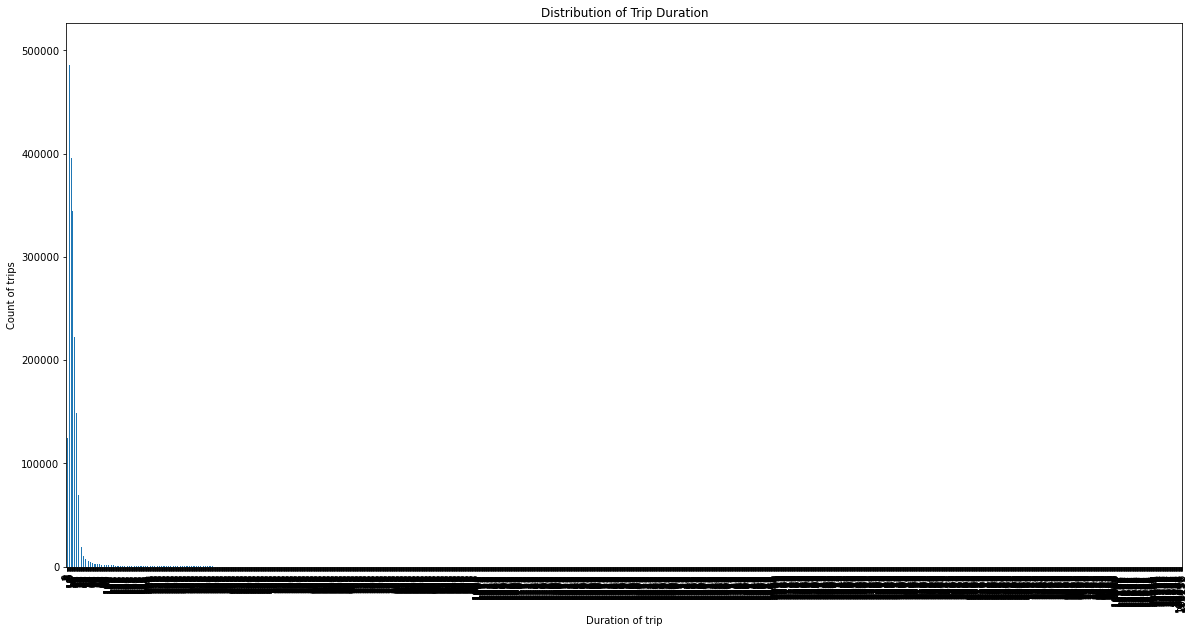

In [227]:
# Look at the distribution of trip lengths
plt.figure(figsize=(20,10))
df['Trip Duration Minutes'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Duration of trip')
plt.ylabel('Count of trips')
plt.title('Distribution of Trip Duration')
plt.show()

As suspected from the basic statistics before running this graph we see that the majority of rides are concentrated in the 12 min mark with the long tail of rides that stretch out to the longest trip length of ~200,000 min.

We will need to address this imbalance by either binning the trips into categories or dropping datapoints where trips exceed a threshold.

Based on the Toronto BikeShare Usage Fees
https://bikesharetoronto.com/get-pass/

Riders only get overfee charges after the trip length is >30min. therefore I will create a binary feature to figure out if we can predict a trip from having overfee charges.

In [228]:
# Replace `Trip Duration Minutes` with binary value
df['Late Return'] = np.where(df['Trip Duration Minutes'] > 30, 1, 0)

# Display value counts
print('Distribution of dependent variables:\n')
print(df['Late Return'].value_counts())
print('\n----------------------------------------\n')
print('Pecentage of the distribution:\n')
print(df['Late Return'].value_counts()/(len(df['Late Return'])))

Distribution of dependent variables:

0    7902934
1     543229
Name: Late Return, dtype: int64

----------

Pecentage of the distribution:

0    0.935683
1    0.064317
Name: Late Return, dtype: float64


Approx. 6.9% of total trips were returned late. This is a presents an imbalanced classification problem when this variable is used for machine learning models later in the next notebook. We will have to take a look into methods to fix the imbalance issue.

Lets take a look into into the top performing stations.

In [229]:
# Need to separate years into separate df before graphing
df_2017_start = df[df['Start Time'].dt.year==2017]
df_2018_start = df[df['Start Time'].dt.year==2018]
df_2019_start = df[df['Start Time'].dt.year==2019]
df_2020_start = df[df['Start Time'].dt.year==2020]
df_2017_end = df[df['End Time'].dt.year==2017]
df_2018_end = df[df['End Time'].dt.year==2018]
df_2019_end = df[df['End Time'].dt.year==2019]
df_2020_end = df[df['End Time'].dt.year==2020]

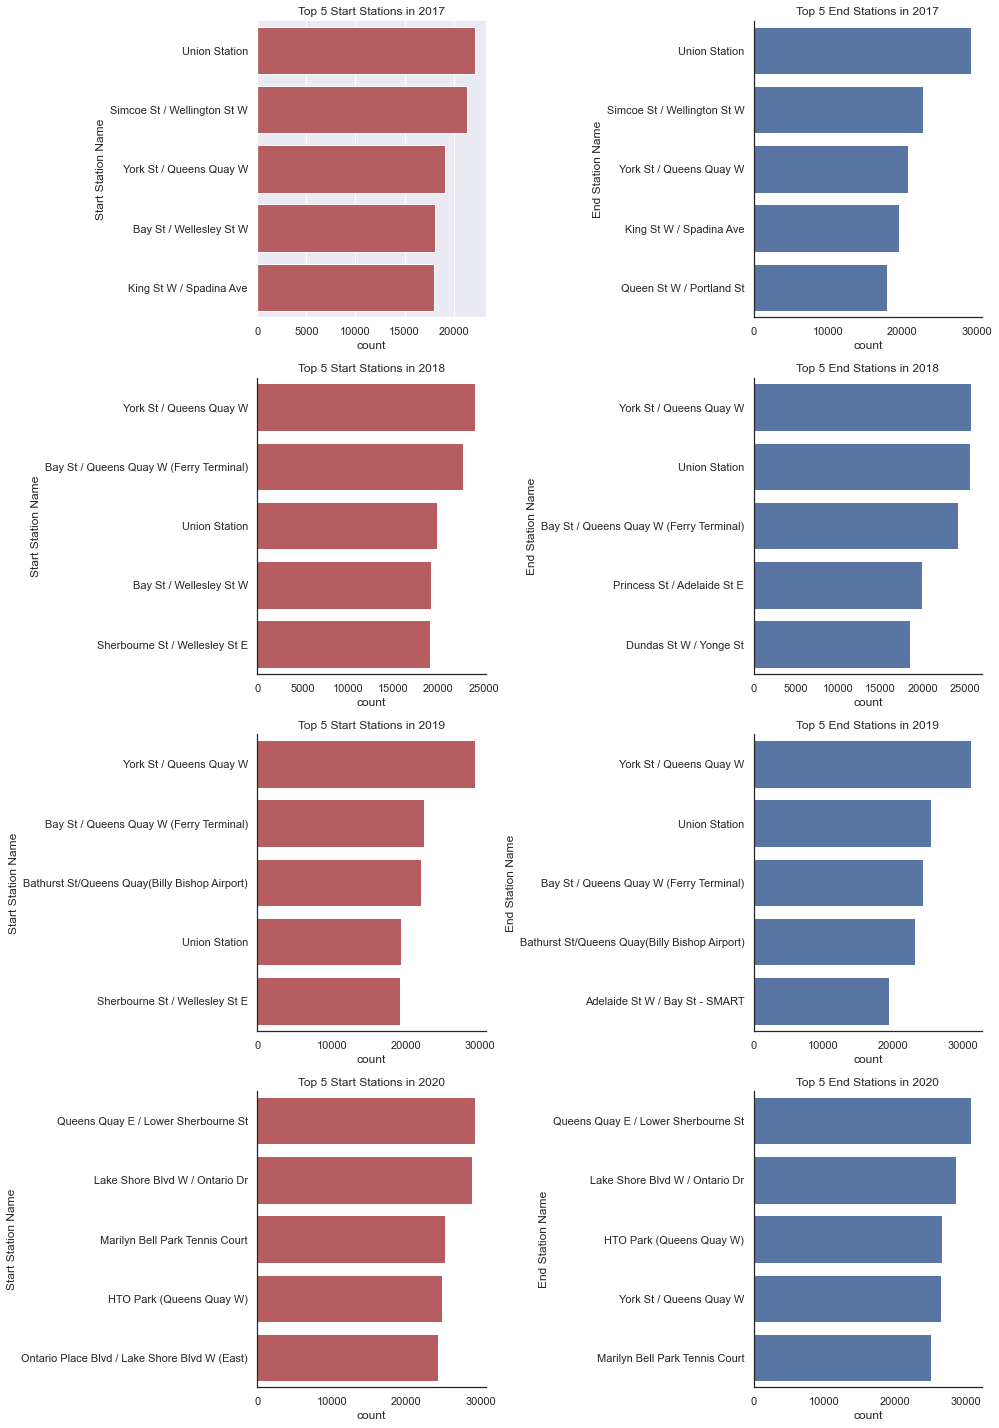

In [245]:
# Subplots of the top 5 used Start and End Station each year
# Can possibly shorten the code in the fture by writing a loop function.

plt.subplots(4, 2, figsize=(14, 20))

# Top 5 Start Stations 2017
plt.subplot(4, 2, 1)
sns.set_style("white")
sns.countplot(y=df_2017_start['Start Station Name'], 
              data=df_2017_start, 
              color='r', 
              order=df_2017_start['Start Station Name'].value_counts().index[:5])
plt.title('Top 5 Start Stations in 2017')

# Top 5 End Stations 2017
plt.subplot(4, 2, 2)
sns.set_style("white")
sns.countplot(y=df_2017_end['End Station Name'], 
              data=df_2017_end, 
              color='b', 
              order=df_2017_end['End Station Name'].value_counts().index[:5])
plt.title('Top 5 End Stations in 2017')

# Top 5 Start Stations 2018
plt.subplot(4, 2, 3)
sns.set_style("white")
sns.countplot(y=df_2018_start['Start Station Name'], 
              data=df_2018_start, 
              color='r', 
              order=df_2018_start['Start Station Name'].value_counts().index[:5])
plt.title('Top 5 Start Stations in 2018')

# Top 5 End Stations 2018
plt.subplot(4, 2, 4)
sns.set_style("white")
sns.countplot(y=df_2018_end['End Station Name'], 
              data=df_2018_end, 
              color='b', 
              order=df_2018_end['End Station Name'].value_counts().index[:5])
plt.title('Top 5 End Stations in 2018')

# Top 5 Start Stations 2019
plt.subplot(4, 2, 5)
sns.set_style("white")
sns.countplot(y=df_2019_start['Start Station Name'], 
              data=df_2019_start, 
              color='r', 
              order=df_2019_start['Start Station Name'].value_counts().index[:5])
plt.title('Top 5 Start Stations in 2019')

# Top 5 End Stations 2019
plt.subplot(4, 2, 6)
sns.set_style("white")
sns.countplot(y=df_2019_end['End Station Name'], 
              data=df_2019_end, 
              color='b', 
              order=df_2019_end['End Station Name'].value_counts().index[:5])
plt.title('Top 5 End Stations in 2019')

# Top 5 Start Stations 2020
plt.subplot(4, 2, 7)
sns.set_style("white")
sns.countplot(y=df_2020_start['Start Station Name'], 
              data=df_2020_start, 
              color='r', 
              order=df_2020_start['Start Station Name'].value_counts().index[:5])
plt.title('Top 5 Start Stations in 2020')

# Top 5 End Stations 2020
plt.subplot(4, 2, 8)
sns.set_style("white")
sns.countplot(y=df_2020_end['End Station Name'], 
              data=df_2020_end, 
              color='b',
              order=df_2020_end['End Station Name'].value_counts().index[:5])
plt.title('Top 5 End Stations in 2020')

sns.despine()
plt.tight_layout()
plt.show()

Observations
Station usage pattern have been relatively consistant the previous 3 years where the top 5 start and stop stations have been a mix of downtown stations and harbourfront where in 2020 all the top start and stop stations are along the harbourfront. Usage has also been higher than previous years with data only up to October and have two months remaining in the year.

In [231]:
# Save indexed FSAs to a separate df to be merged back later.
stat_name_df = df[['Start Station Name','End Station Name']]
FSA_df = df[['Start Station FSA', 'End Station FSA']]

In [232]:
# Drop non-numeric features
df.drop(['Start Station Name',
        'Start Station FSA',
        'End Station Name',
        'End Station FSA'], axis=1, inplace=True)

---

Trip Id

---


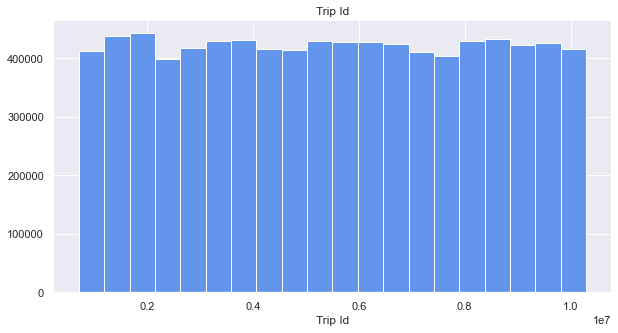

---

Start Time

---


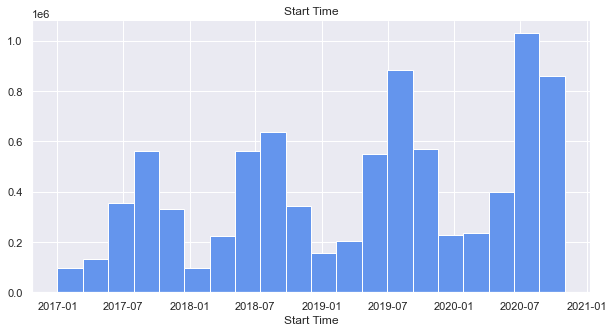

---

Start Station Id

---


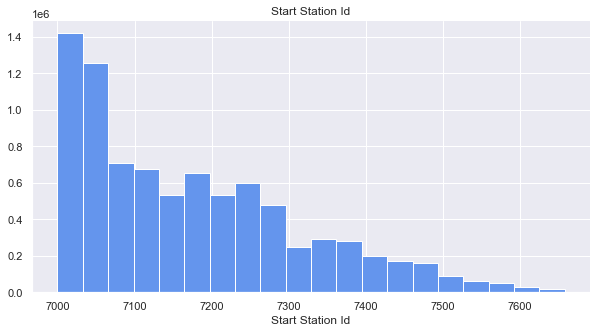

---

Start Station Latitude

---


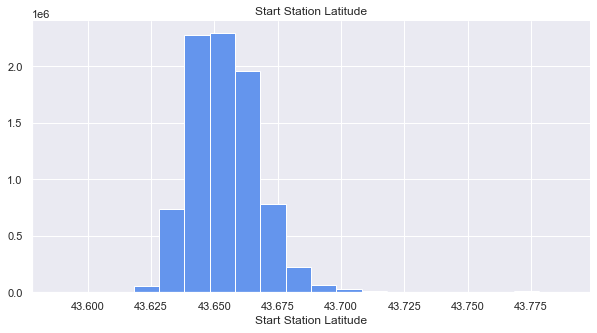

---

Start Station Longitude

---


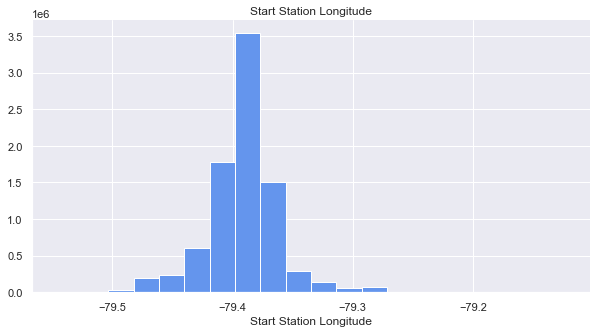

---

Start Station Elevation

---


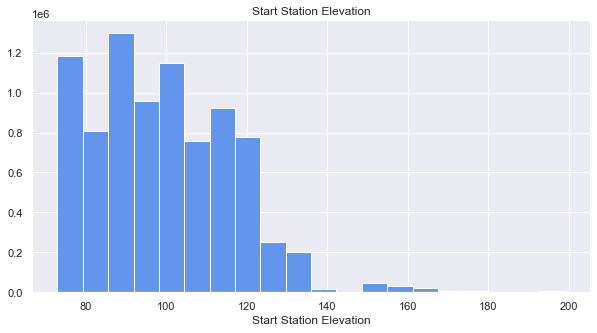

---

Start Station Capacity

---


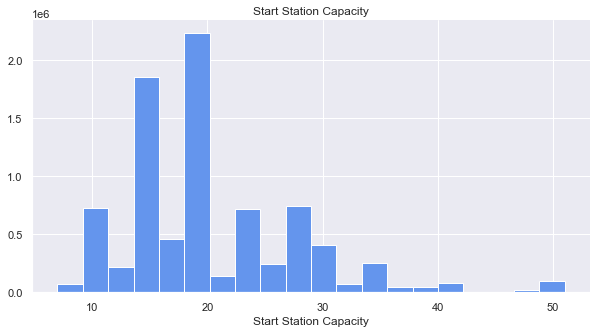

---

Start Station Accepts Credit Card

---


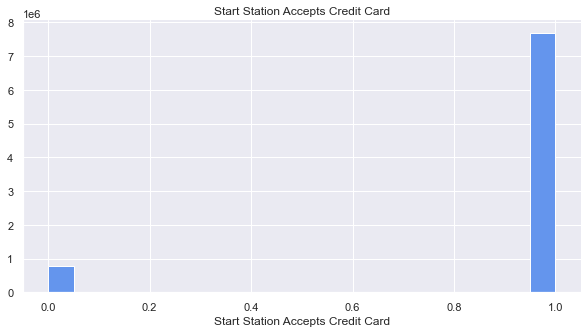

---

End Time

---


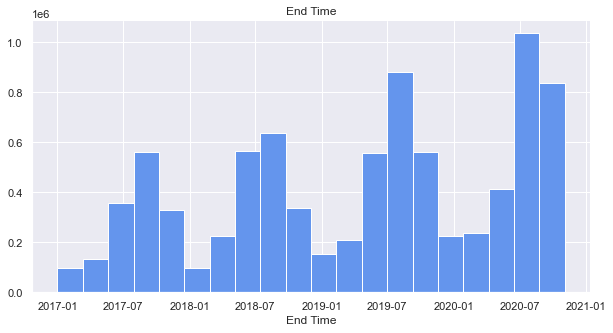

---

End Station Id

---


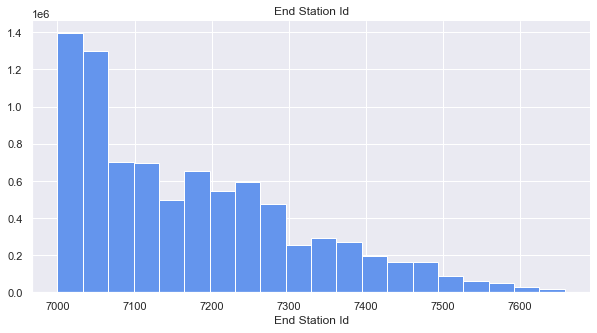

---

End Station Latitude

---


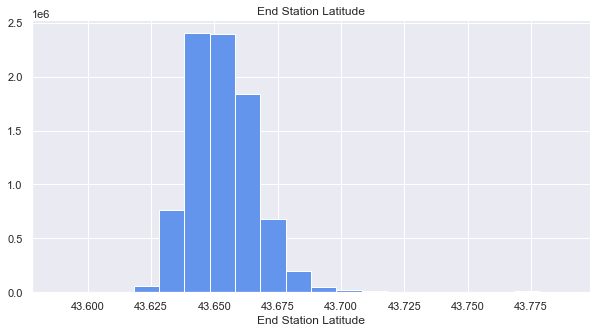

---

End Station Longitude

---


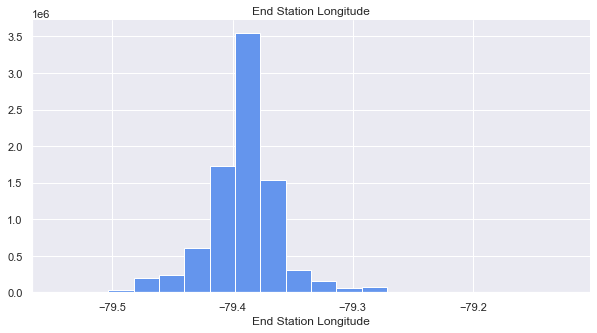

---

End Station Elevation

---


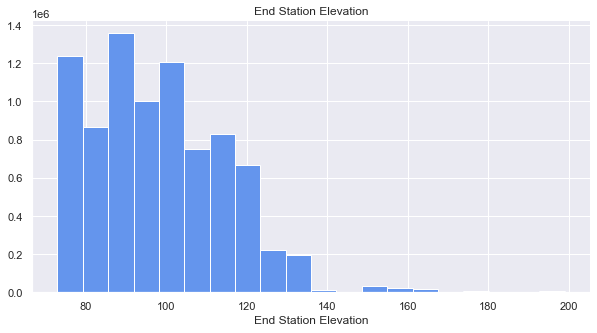

---

End Station Capacity

---


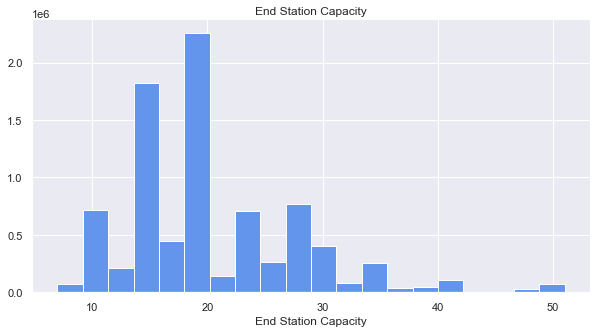

---

End Station Accepts Credit Card

---


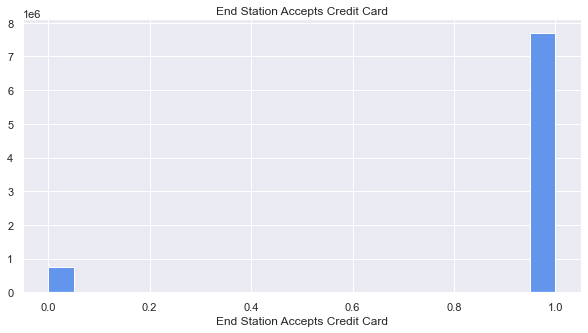

---

Trip Duration Minutes

---


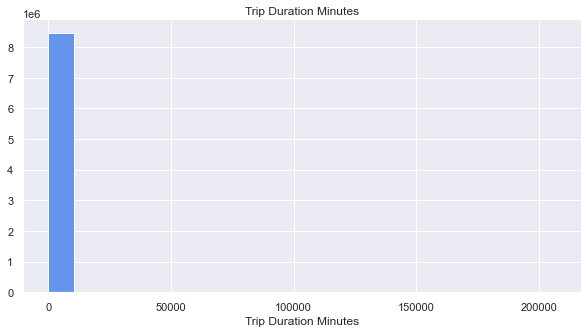

---

Is Member

---


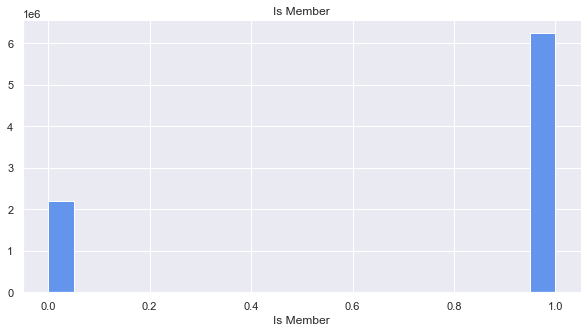

---

Temp (°C)

---


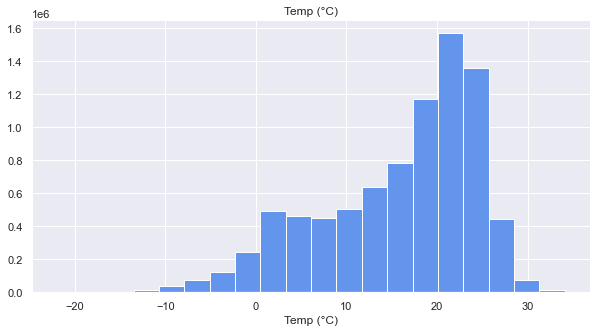

---

Rel Hum (%)

---


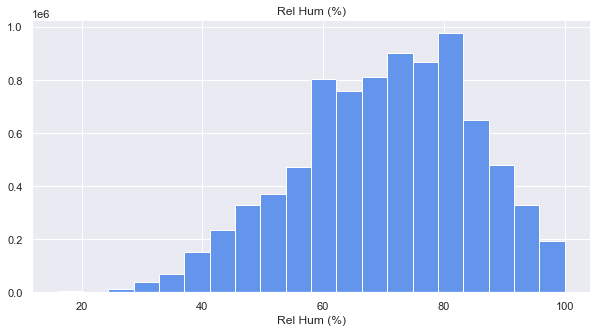

---

Wind Spd (km/h)

---


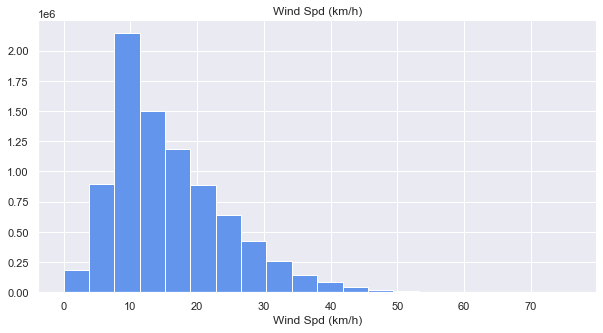

---

Late Return

---


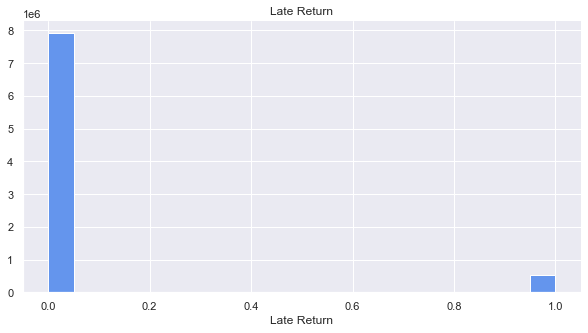

In [233]:
# Display histogram for each feature in dataframe
for col in df:
    print('----------\n')
    print(col)
    print('\n----------')
    plt.figure(figsize=(10, 5))
    plt.title(col)
    plt.hist(df[col], color='cornflowerblue', bins=20)
    plt.xlabel(col)
    sns.despine()
    plt.show()

**Observations**
- There is a clear seasonality displayed in the Start Time and End Time columns based on bike usage trend. 
- There tight binning happening in the Latitude and Longitude columns that may connote tight clustering of stations or that users take trips in a small geographic area, this can be better displayed on a map or network graph.
- Most common trips are taken from stations with capacity around 20 bikes then 15 bikes and thirdly 10 bikes.
- Most common temperature at the start of trip is around 18-25°C which can indicate that is the most ideal temperature bike users prefer to take trips.
- Most common relative humidity at the start of trip is between 60% to 80% which can indicate that is the most ideal relative humidity bike users prefer to take trips.
- Most common wind speed at the start of trip is between 10-15km/h which can indicate that is the most ideal wind speed users prefer to take trips.

## Time Scale Graphs

Back to [Table of Contents](#Table-of-Contents).<br>

I will now chart to time series graphs of the bike usage over the 4 years of dataset.

In [234]:
# Saving all trips `Start Time` to a temp series
t_series = pd.to_datetime(df['Start Time'])

# Creating dataframe and groupby day with count of trips
dailytrips_df = t_series.groupby(t_series.dt.floor('d')).size().reset_index(name='Trip Count')

# Check
print (dailytrips_df)

     Start Time  Trip Count
0    2017-01-01         487
1    2017-01-02        1632
2    2017-01-03        2013
3    2017-01-04        1442
4    2017-01-05        1411
...         ...         ...
1359 2020-10-27        5015
1360 2020-10-28        8531
1361 2020-10-29        6796
1362 2020-10-30        6591
1363 2020-10-31        8323

[1364 rows x 2 columns]


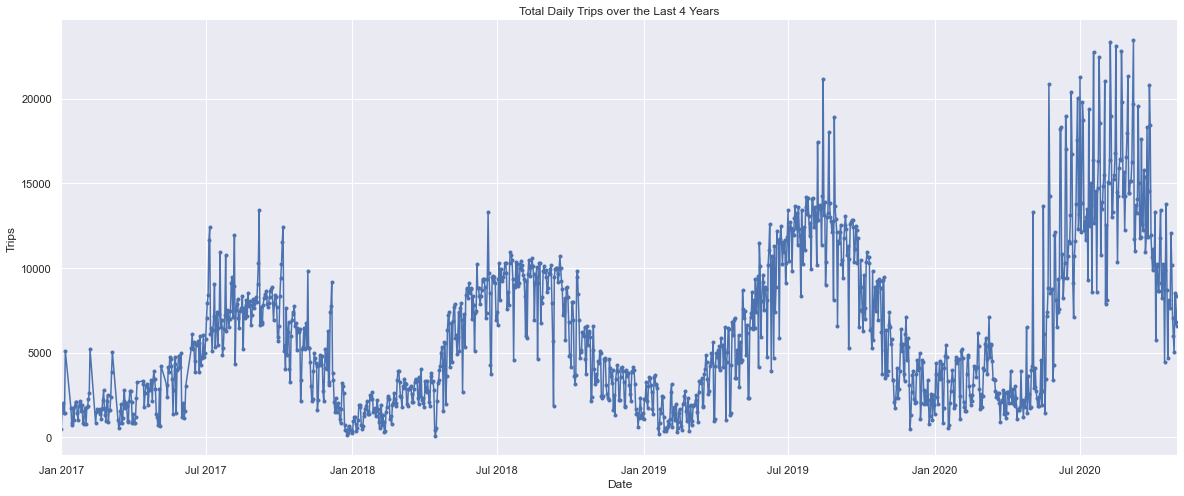

In [235]:
from matplotlib.dates import DateFormatter

# Plot time series chart for all daily trips
plt.figure(figsize=(20,8))
ax = plt.gca()
plt.plot(dailytrips_df['Start Time'], dailytrips_df['Trip Count'], marker='.')
plt.xlabel('Date')
plt.ylabel('Trips')
plt.title('Total Daily Trips over the Last 4 Years')
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))

sns.despine()
plt.show();

**Observations**<br>
Trips have been on the upward trend over the years with the last few months having the most variation between each day compared to previous years.

In [236]:
# Closer look into each year
dailytrips_df_2017 = dailytrips_df[dailytrips_df['Start Time'].dt.year==2017]
dailytrips_df_2018 = dailytrips_df[dailytrips_df['Start Time'].dt.year==2018]
dailytrips_df_2019 = dailytrips_df[dailytrips_df['Start Time'].dt.year==2019]
dailytrips_df_2020 = dailytrips_df[dailytrips_df['Start Time'].dt.year==2020]

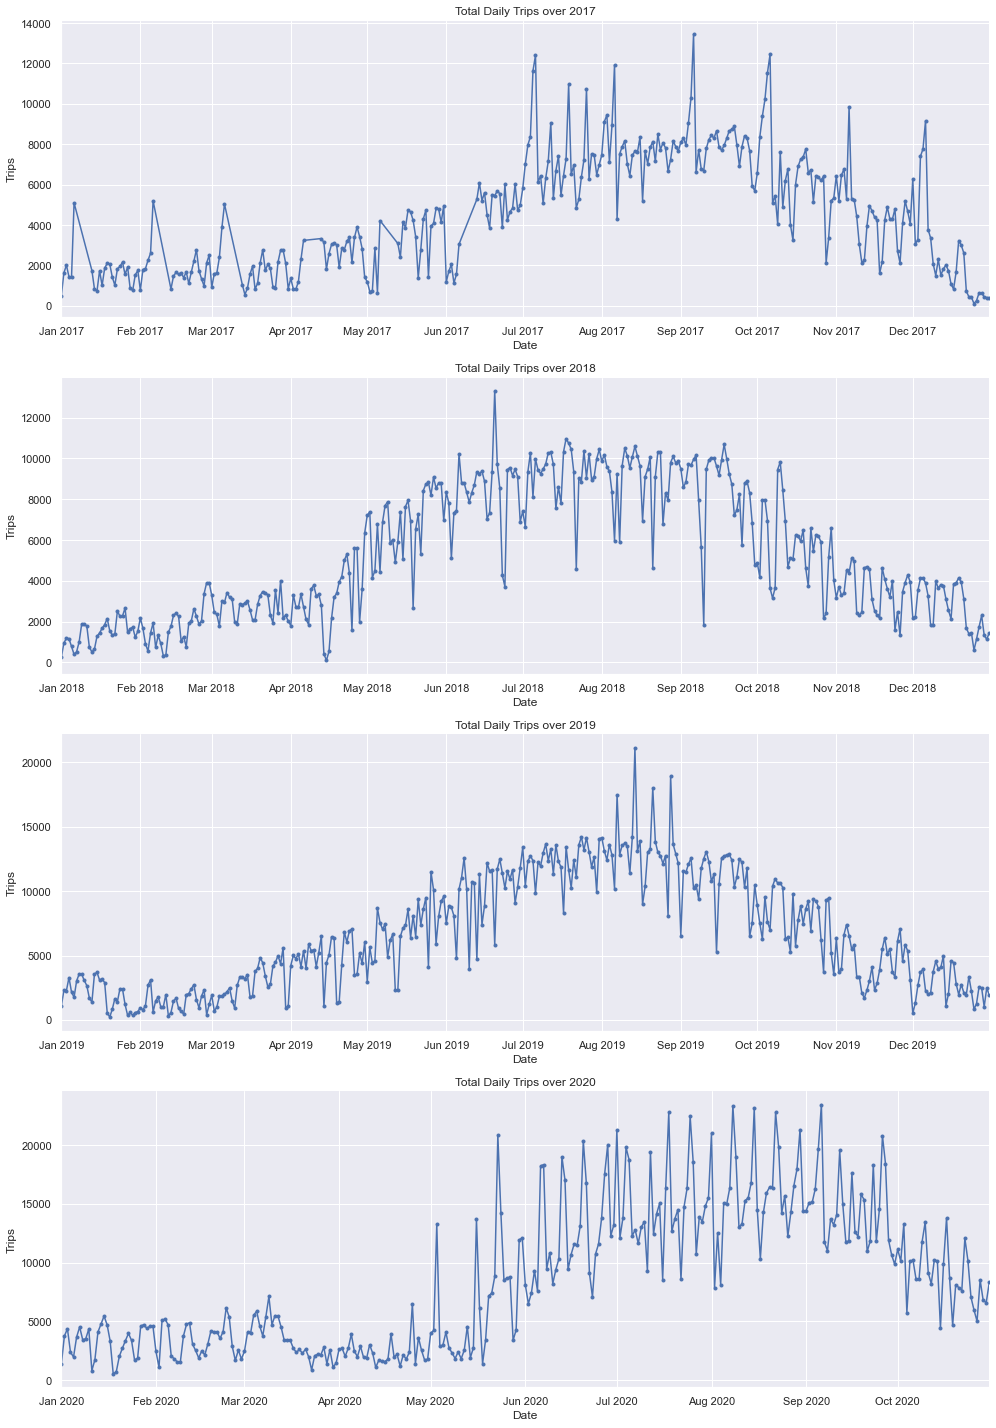

In [237]:
# Subplots of the time series chart of each year
# Can possibly shorten the code in the fture by writing a loop function.

plt.subplots(4, 2, figsize=(14, 20))

# Daily trips for 2017
plt.subplot(4, 1, 1)
ax = plt.gca()
plt.plot(dailytrips_df_2017['Start Time'], dailytrips_df_2017['Trip Count'], marker='.')
plt.xlabel('Date')
plt.ylabel('Trips')
plt.title('Total Daily Trips over 2017')
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))

# Daily trips for 2018
plt.subplot(4, 1, 2)
ax = plt.gca()
plt.plot(dailytrips_df_2018['Start Time'], dailytrips_df_2018['Trip Count'], marker='.')
plt.xlabel('Date')
plt.ylabel('Trips')
plt.title('Total Daily Trips over 2018')
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))

# Daily trips for 2019
plt.subplot(4, 1, 3)
ax = plt.gca()
plt.plot(dailytrips_df_2019['Start Time'], dailytrips_df_2019['Trip Count'], marker='.')
plt.xlabel('Date')
plt.ylabel('Trips')
plt.title('Total Daily Trips over 2019')
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))

# Daily trips for 2020
plt.subplot(4, 1, 4)
ax = plt.gca()
plt.plot(dailytrips_df_2020['Start Time'], dailytrips_df_2020['Trip Count'], marker='.')
plt.xlabel('Date')
plt.ylabel('Trips')
plt.title('Total Daily Trips over 2020')
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))

sns.despine()
plt.tight_layout()
plt.show()

## Maps

Back to [Table of Contents](#Table-of-Contents).<br>

I will now map out the distruption of the bike stations in Toronto. Toronto FSA GeoJSON found [here](https://github.com/ag2816/Visualizations/tree/26628a6735ba42062bc2433f3e6837c1ab41a8bf/data) will be used to create a choropleth map of the distribution of Toronto BikeShare Stations.

In [238]:
# Import folium map package
import folium

In [239]:
# Group by count of bike stations by `fsa`
bike_station_count = station_info['fsa'].value_counts()

# Transform series to dataframe
bike_station_count = bike_station_count.to_frame().reset_index()

# Rename columns
bike_station_count.rename(columns={'index':'fsa', 'fsa':'station_count'}, inplace=True)

In [240]:
# Check count
bike_station_count.head()

,fsa,station_count
0,M5V,46
1,M5A,43
2,M6K,28
3,M5S,24
4,M6P,23


In [241]:
# Check dtypes
bike_station_count.dtypes

fsa              object
station_count     int64
dtype: object

In [242]:
# Create list of bike station locations
locations = station_info[['latitude', 'longitude']]
locationlist = locations.values.tolist()

In [246]:
# Assigning the map to a variable
toronto_map = folium.Map(location=[43.653963, -79.387207],
                         tiles='CartoDB positron',
                         zoom_start=10)

# Plot choropleth onto map
folium.Choropleth(geo_data='data/Toronto_by_FSA.geojson',
                  data = bike_station_count,
                  columns=['fsa','station_count'],
                  key_on='feature.properties.CFSAUID',
                  bins=9,
                  fill_color='YlOrRd',
                  fill_opacity=0.75,
                  nan_fill_opacity=0,                   
                  line_opacity=0.5,
                  legend_name='Bike Station Count by FSA'
                  ).add_to(toronto_map)   
# Display map
toronto_map

**Observations**<br>
You can see that a majority of stations are location in two FSAs, one that is located in the financial centre and the next around KingWest/CityPlace neighbourhood. There are also ssmall atellites in the north and east of the city.

In [244]:
import folium.plugins as plugins

# Assigning the map to variable
toronto_map2 = folium.Map(location=[43.653963, -79.387207],
                         tiles='CartoDB positron',
                         zoom_start=10)

# Add marker cluster plugin
marker_cluster = plugins.MarkerCluster().add_to(toronto_map2)

# Draw markers on map
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], 
                  popup=station_info['name'][point], 
                  icon=folium.Icon(color='green', icon_color='white', icon='bicycle', angle=0, prefix='fa')).add_to(marker_cluster)
# Display map
toronto_map2

**Observations**<br>
This is another way to visualize exact locations of the bike stations while it reactively clusters the stations as you zoom out. 

---
Next steps will be to complete Machine Learning Models, Time Series Analysis, and Network Analysis in subsequent notebooks.